In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, RidgeCV, LassoCV, Ridge, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from scipy import stats

pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

### Biochemistry

In [7]:
BIOPRO = pd.read_csv('./output/df_BIOPRO.csv') 

In [8]:
BIOPRO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15503 entries, 0 to 15502
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQN           15503 non-null  float64
 1   albumin        15503 non-null  float64
 2   ALT            15503 non-null  float64
 3   AST            15503 non-null  float64
 4   ALP            15503 non-null  float64
 5   BUN            15503 non-null  float64
 6   calcium        15503 non-null  float64
 7   bicarbonate    15503 non-null  float64
 8   creatinine     15503 non-null  float64
 9   GGT            15503 non-null  float64
 10  glucose        15503 non-null  float64
 11  iron           15503 non-null  float64
 12  LHD            15503 non-null  float64
 13  phosphorus     15503 non-null  float64
 14  bilirubin      15503 non-null  float64
 15  total_protein  15503 non-null  float64
 16  uric_acid      15503 non-null  float64
 17  sodium         15503 non-null  float64
 18  potass

C:\Users\skyne\AppData\Local\Temp\ipykernel_15964\3560996213.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  BIOPRO.hist(ax=ax, grid=False, bins=10)


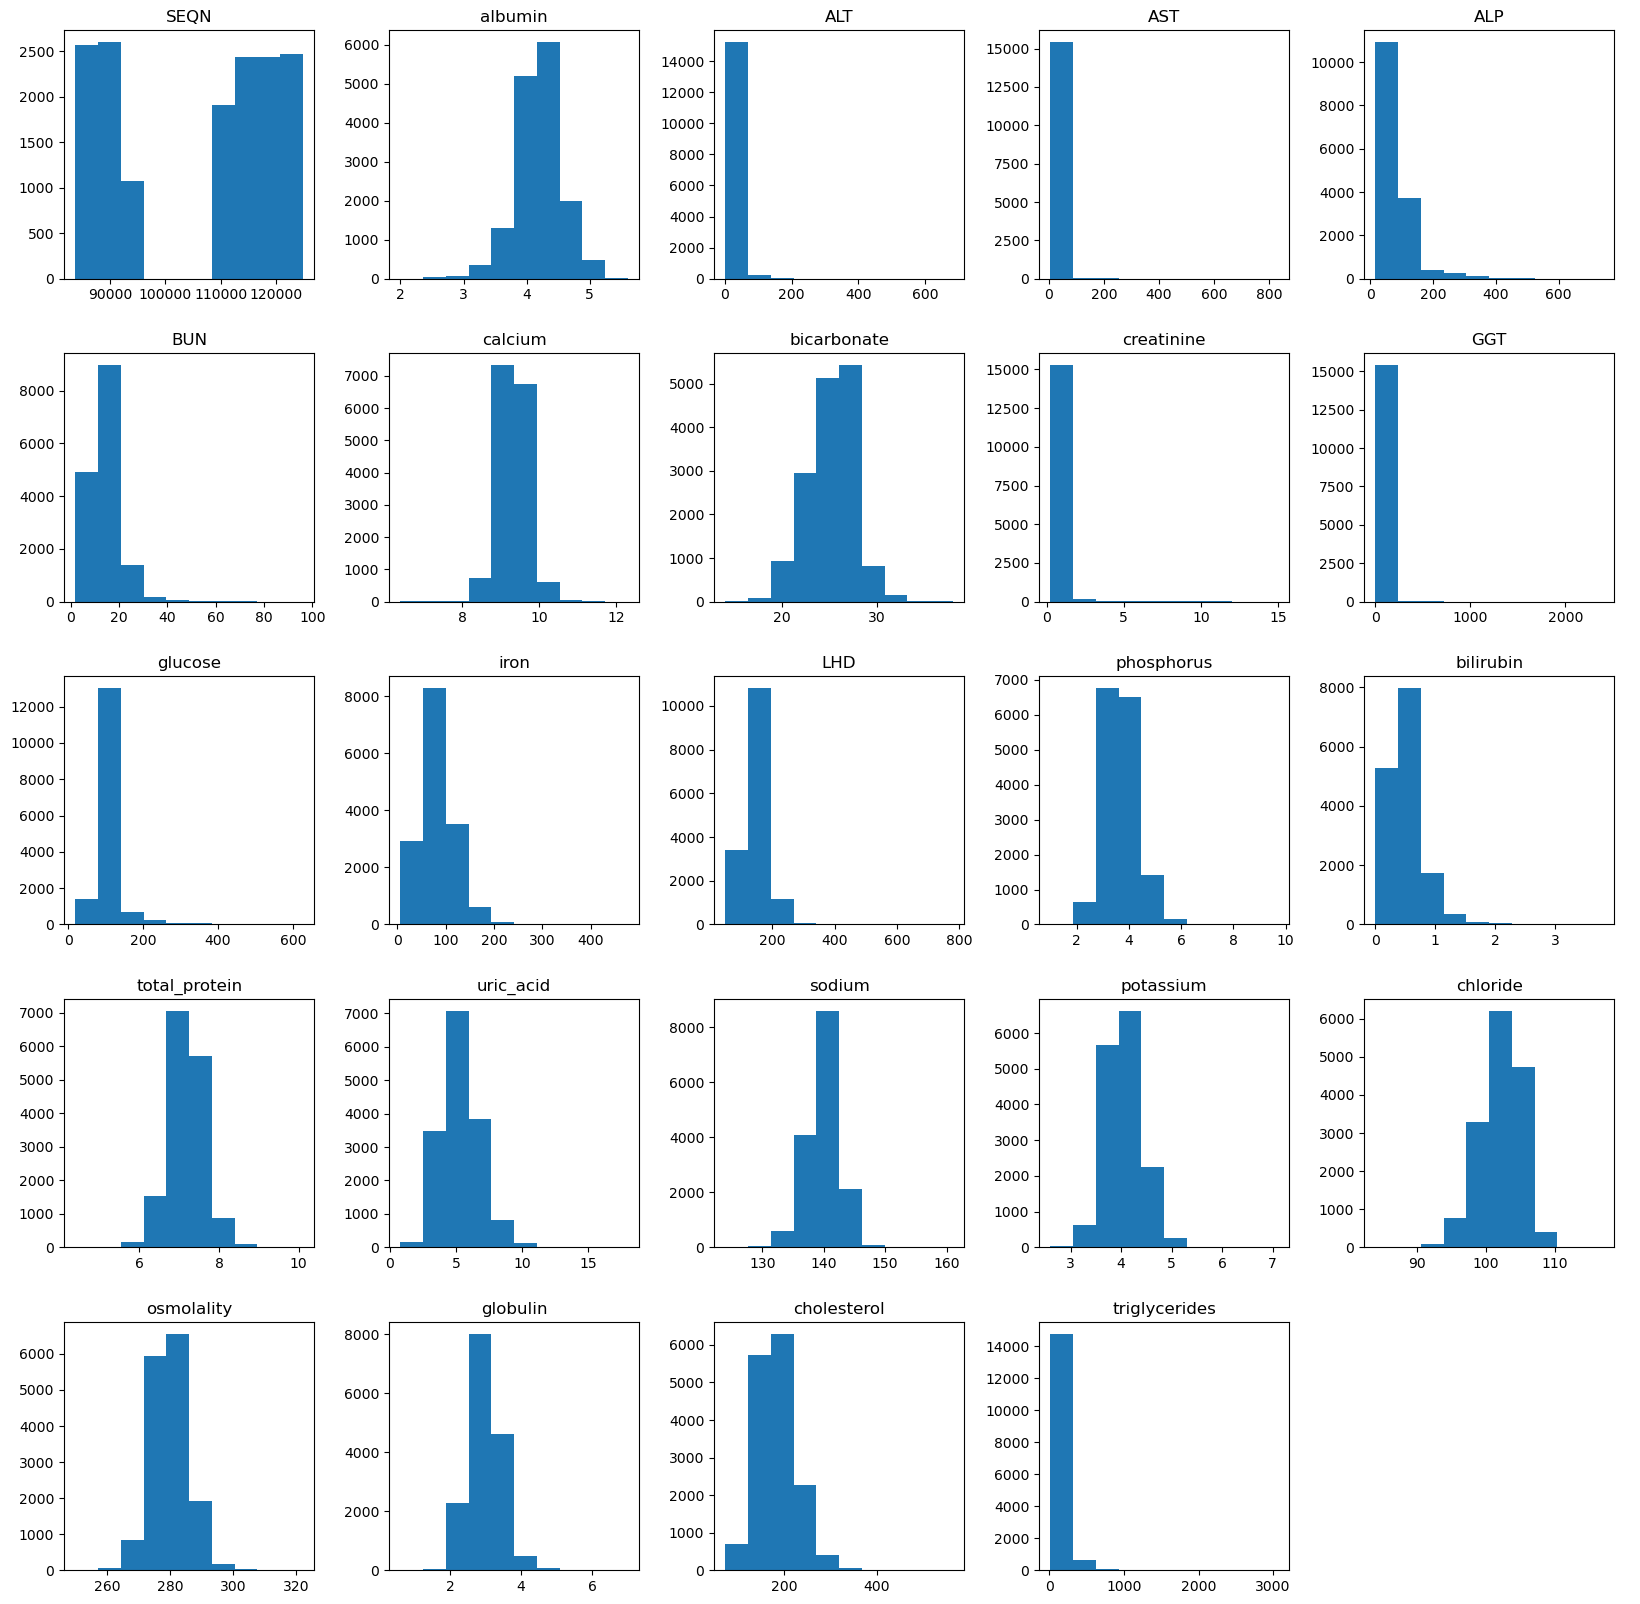

In [236]:
#Histograms - variables
fig = plt.figure(figsize = (20,20))
plt.title("Histogram of each feature")
ax = fig.gca()
BIOPRO.hist(ax=ax, grid=False, bins=10)
plt.show()

In [ ]:
BIOPRO

### Blood Pressure

In [15]:
BPX = pd.read_csv('./output/df_BPX.csv')

In [16]:
BPX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEQN          16833 non-null  float64
 1   60_sec_pulse  16833 non-null  float64
 2   systolic_bp   16833 non-null  float64
 3   diastolic_bp  16833 non-null  float64
dtypes: float64(4)
memory usage: 526.2 KB


### Body Measures

In [24]:
BMX = pd.read_csv('./output/df_BMX.csv')

In [25]:
BMX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20828 entries, 0 to 20827
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEQN                 20828 non-null  float64
 1   weight               20828 non-null  float64
 2   height               20828 non-null  float64
 3   BMI                  20828 non-null  float64
 4   waist_circumference  20828 non-null  float64
dtypes: float64(5)
memory usage: 813.7 KB


### Blood Pressure & Cholesterol

In [32]:
BPQ = pd.read_csv('./output/df_BPQ.csv')

In [33]:
BPQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16395 entries, 0 to 16394
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEQN               16395 non-null  float64
 1   hypertension       16395 non-null  int64  
 2   take_HTN_medicine  16395 non-null  object 
 3   high_cholesterol   16395 non-null  int64  
 4   take_HCL_medicine  16395 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 640.6+ KB


### Demographic data

In [40]:
DEMO = pd.read_csv('./output/df_DEMO.csv')

In [41]:
DEMO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25531 entries, 0 to 25530
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             25531 non-null  float64
 1   gender           25531 non-null  int64  
 2   age              25531 non-null  float64
 3   race             25531 non-null  object 
 4   education_level  25531 non-null  object 
 5   marital_status   25531 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


### Diabetes

In [71]:
DIQ = pd.read_csv('./output/df_DIQ.csv')

In [72]:
DIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      24549 non-null  float64
 1   diabetes  24549 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 383.7 KB


### Total Cholesterol (mg/dL)

In [80]:
TCHOL = pd.read_csv('./output/df_TCHOL.csv')

In [81]:
TCHOL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18084 entries, 0 to 18083
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEQN               18084 non-null  float64
 1   total_cholesterol  18084 non-null  float64
dtypes: float64(2)
memory usage: 282.7 KB


### Cholesterol - Low - Density Lipoprotein (LDL) & Triglycerides (mg/dL)

In [89]:
TRIGLY = pd.read_csv('./output/df_TRIGLY.csv')

In [90]:
TRIGLY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEQN          7316 non-null   float64
 1   triglyceride  7316 non-null   float64
 2   LDL           7316 non-null   float64
dtypes: float64(3)
memory usage: 171.6 KB


### Cholesterol - High - Density Lipoprotein (HDL) (mg/dL)

In [98]:
HDL = pd.read_csv('./output/df_HDL.csv')

In [99]:
HDL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18084 entries, 0 to 18083
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    18084 non-null  float64
 1   HDL     18084 non-null  float64
dtypes: float64(2)
memory usage: 282.7 KB


### Health Insurance

In [107]:
HIQ = pd.read_csv('./output/df_HIQ.csv')

In [108]:
HIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25475 entries, 0 to 25474
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       25475 non-null  float64
 1   insurance  25475 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 398.2 KB


### Hospital Utilization & Access to Care

In [115]:
HUQ = pd.read_csv('./output/df_HUQ.csv')

In [116]:
HUQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25461 entries, 0 to 25460
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      25461 non-null  float64
 1   times_receive_healthcare  25461 non-null  object 
dtypes: float64(1), object(1)
memory usage: 398.0+ KB


### Medical Conditions

In [156]:
MCQ = pd.read_csv('./output/df_MCQ.csv')

In [157]:
MCQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24561 entries, 0 to 24560
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    24561 non-null  float64
 1   heart_failure           24561 non-null  object 
 2   coronary_heart_disease  24561 non-null  object 
 3   angina                  24561 non-null  object 
 4   heart_attack            24561 non-null  object 
 5   stroke                  24561 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


### Physical Activity

In [164]:
PAQ = pd.read_csv('./output/df_PAQ.csv')

In [165]:
PAQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18933 entries, 0 to 18932
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SEQN                               18933 non-null  float64
 1   vigorous_activity_work             18933 non-null  object 
 2   days_vigorous_activity_work        18933 non-null  object 
 3   moderate_activity_work             18933 non-null  object 
 4   days_moderate_activity_work        18933 non-null  object 
 5   vigorous_activity_recreation       18933 non-null  object 
 6   days_vigorous_activity_recreation  18933 non-null  object 
 7   moderate_activity_recreation       18933 non-null  object 
 8   days_moderate_activity_recreation  18933 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


### Prescription Medications

In [170]:
RXORX = pd.read_csv('./output/df_RXORX.csv')

In [171]:
RXORX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52609 entries, 0 to 52608
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEQN               52609 non-null  float64
 1   taken_rx           52609 non-null  int64  
 2   generic_drug_name  37951 non-null  object 
 3   length_took_rx     52609 non-null  object 
 4   ICD_10_CM_code     37629 non-null  object 
 5   number_rx_taken    52609 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.4+ MB


### Preventive Aspirin Use

In [184]:
RXQASA = pd.read_csv('./output/df_RXQASA.csv')

In [185]:
RXQASA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    10175 non-null  float64
 1   daily_low-dose_aspirin  10173 non-null  float64
dtypes: float64(2)
memory usage: 159.1 KB


### Smoking - Cigarette Use

In [195]:
SMQ = pd.read_csv('./output/df_SMQ.csv')

In [196]:
SMQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18121 entries, 0 to 18120
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    18121 non-null  float64
 1   smoke_100_cigarettes    18121 non-null  object 
 2   smoke_cigarettes        18121 non-null  object 
 3   days_smoked_cigs_month  18121 non-null  object 
 4   avg_cigs_day            18121 non-null  object 
dtypes: float64(1), object(4)
memory usage: 708.0+ KB


### Weight History 

In [203]:
WHQ = pd.read_csv('./output/df_WHQ.csv')

In [204]:
WHQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15174 entries, 0 to 15173
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SEQN                   15174 non-null  float64
 1   tried_lose_weight      15174 non-null  object 
 2   ate_less               15174 non-null  int64  
 3   low_calories_diet      15174 non-null  int64  
 4   low_fat_diet           15174 non-null  int64  
 5   exercise               15174 non-null  int64  
 6   skipped_meals          15174 non-null  int64  
 7   diet_foods             15174 non-null  int64  
 8   liquid_diet            15174 non-null  int64  
 9   weight_loss_program    15174 non-null  int64  
 10  took_prescription      15174 non-null  int64  
 11  took_non_rx            15174 non-null  int64  
 12  took_laxatives         15174 non-null  int64  
 13  drank_lots_water       15174 non-null  int64  
 14  special_diet           15174 non-null  int64  
 15  at

### DataFrame 1: Blood Pressure & Cholesterol (BPQ) + Medical Conditions(MCQ) + Demographic data (DEMO) + Blood Pressure(BPX) + Body Measures(BMX) + Diabetes(DIQ) + Medical Conditions(MCQ)

In [318]:
files = os.listdir("data/df1")
files

['df_BMX.csv',
 'df_BPQ.csv',
 'df_BPX.csv',
 'df_DEMO.csv',
 'df_DIQ.csv',
 'df_MCQ.csv']

In [319]:
df1 = pd.DataFrame()

for file in files:
    df = pd.read_csv("./data/df1/" + file)
    if(df1.size == 0) :
        df1 = df
    else :
        df1 = pd.merge(df1, df, how="outer", on="SEQN")
    print (df1.size)
df1.info()
df1['SEQN'].value_counts() 


104140
204822
274296
434027
459558
587213
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 0 to 25530
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    25531 non-null  float64
 1   weight                  20828 non-null  float64
 2   height                  20828 non-null  float64
 3   BMI                     20828 non-null  float64
 4   waist_circumference     20828 non-null  float64
 5   hypertension            16395 non-null  float64
 6   take_HTN_medicine       16395 non-null  object 
 7   high_cholesterol        16395 non-null  float64
 8   take_HCL_medicine       16395 non-null  object 
 9   60_sec_pulse            16833 non-null  float64
 10  systolic_bp             16833 non-null  float64
 11  diastolic_bp            16833 non-null  float64
 12  gender                  25531 non-null  int64  
 13  age                     25531 non-null  float64
 

83732.0     1
120174.0    1
120170.0    1
120169.0    1
120168.0    1
           ..
109555.0    1
109554.0    1
109553.0    1
109552.0    1
124816.0    1
Name: SEQN, Length: 25531, dtype: int64

In [214]:
# save file
df1.to_csv('./output/df1.csv', index=False)

In [320]:
df1.isna().sum()

SEQN                         0
weight                    4703
height                    4703
BMI                       4703
waist_circumference       4703
hypertension              9136
take_HTN_medicine         9136
high_cholesterol          9136
take_HCL_medicine         9136
60_sec_pulse              8698
systolic_bp               8698
diastolic_bp              8698
gender                       0
age                          0
race                         0
education_level              0
marital_status               0
diabetes                   982
heart_failure              970
coronary_heart_disease     970
angina                     970
heart_attack               970
stroke                     970
dtype: int64

In [321]:
df1 = df1.dropna()

In [322]:
df1.shape

(12938, 23)

In [323]:
df1 = df1.set_index('SEQN')

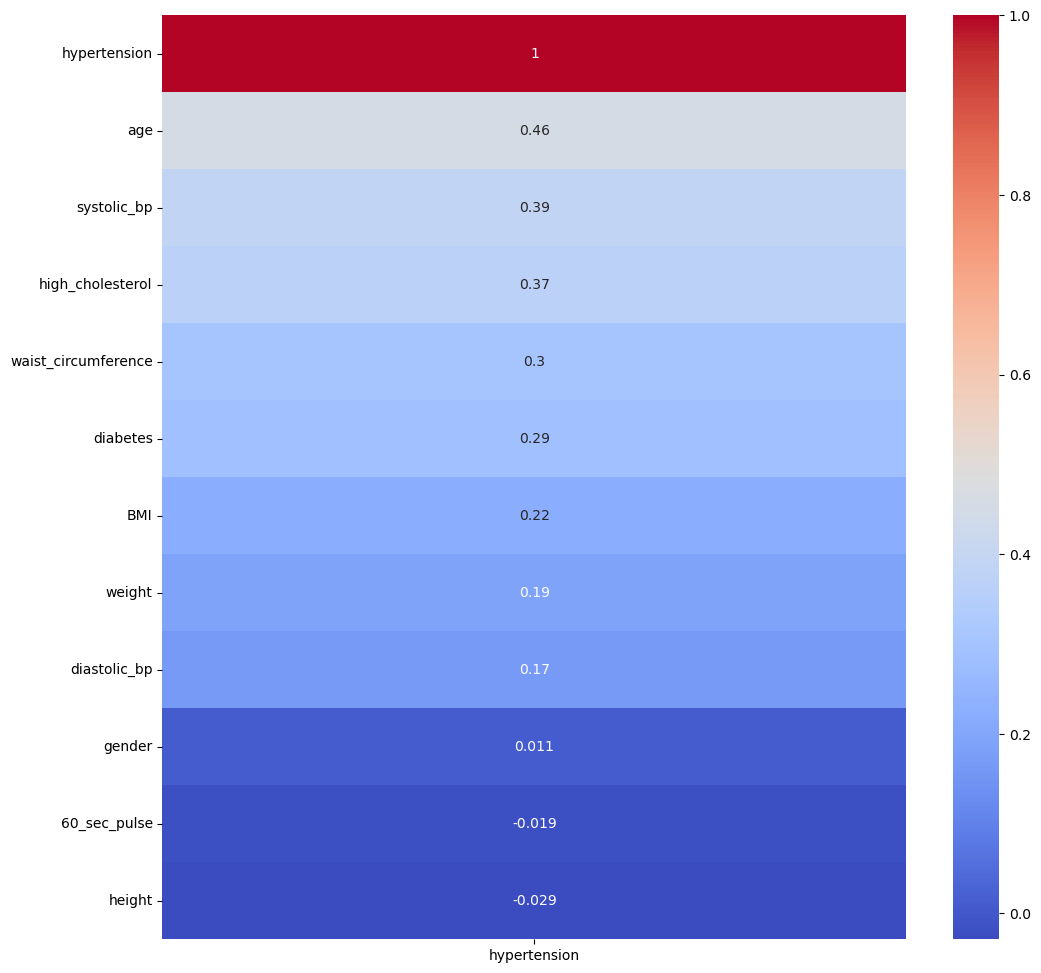

In [356]:
plt.figure(figsize=(12,12))

sns.heatmap(df1.corr()[['hypertension']].sort_values('hypertension', ascending=False), annot=True, cmap='coolwarm');

In [324]:
target = df1.hypertension 

In [325]:
# get categorical
cat_cols = df1.select_dtypes(include=['object'])

In [326]:
cat_cols.columns

Index(['take_HTN_medicine', 'take_HCL_medicine', 'race', 'education_level',
       'marital_status', 'heart_failure', 'coronary_heart_disease', 'angina',
       'heart_attack', 'stroke'],
      dtype='object')

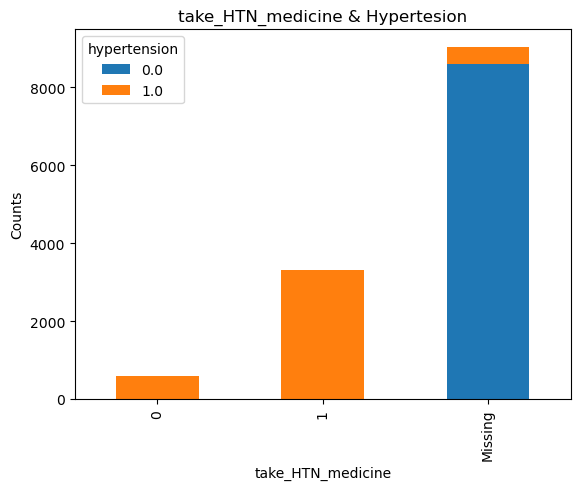

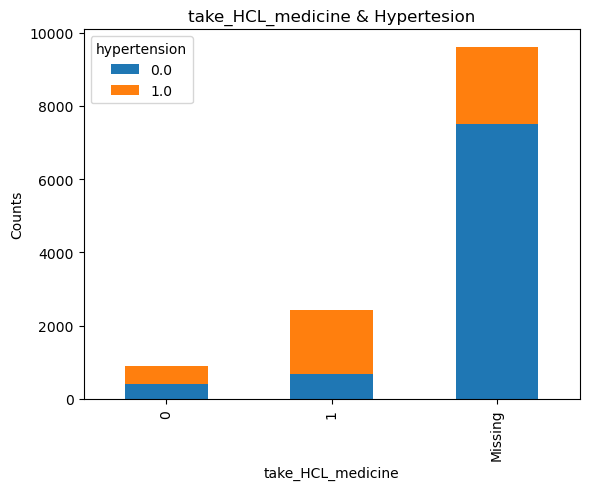

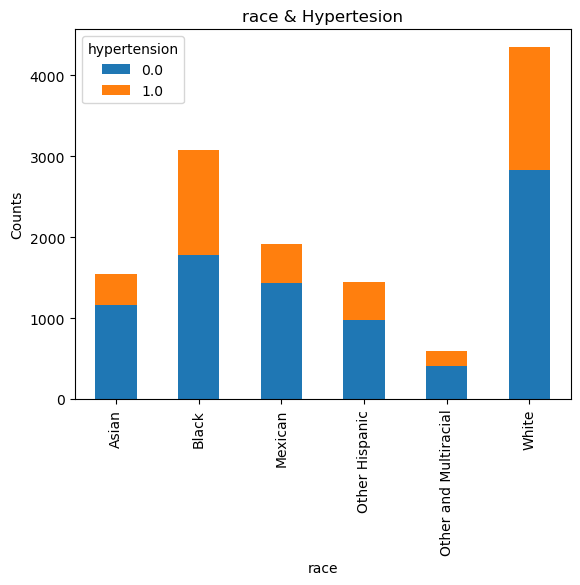

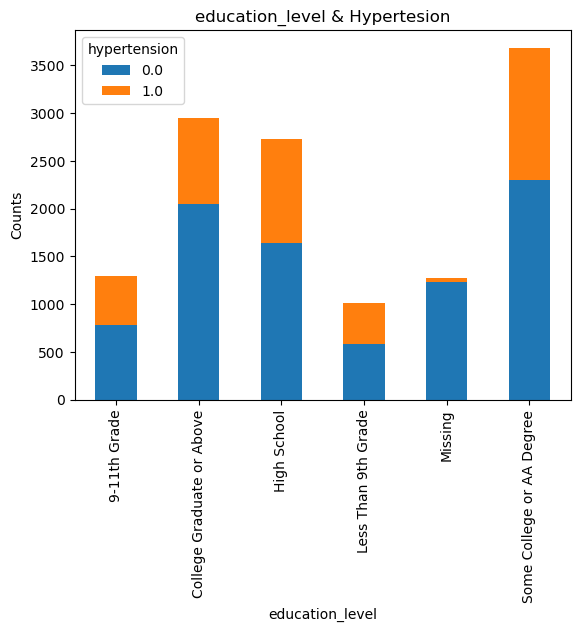

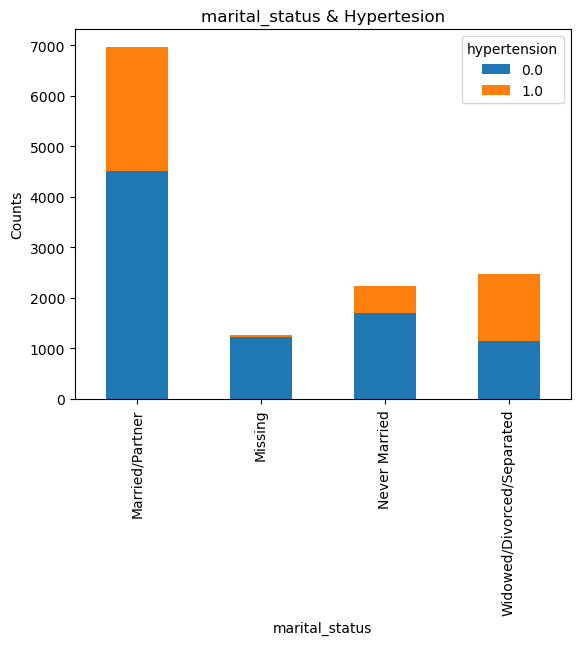

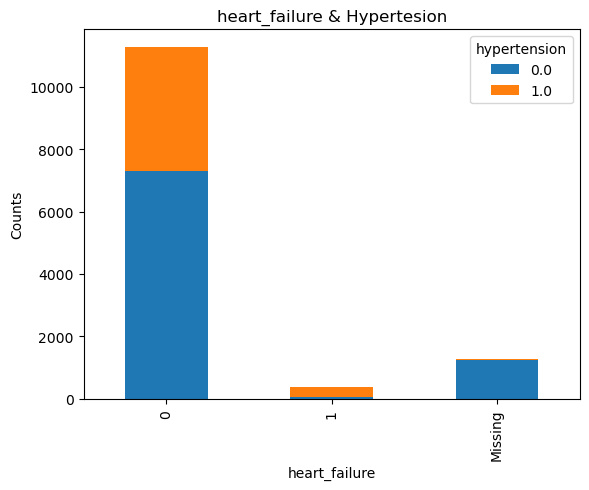

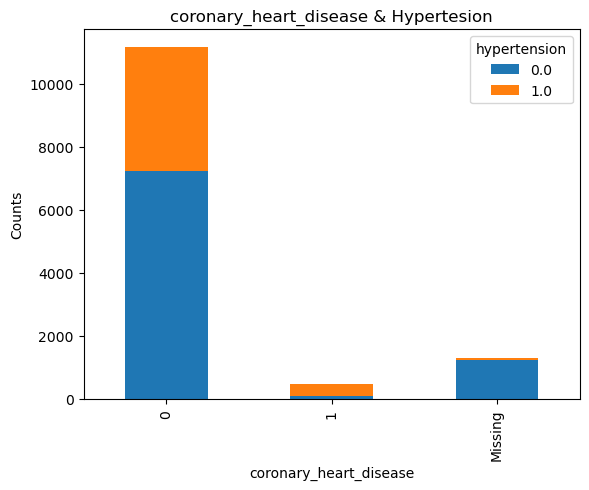

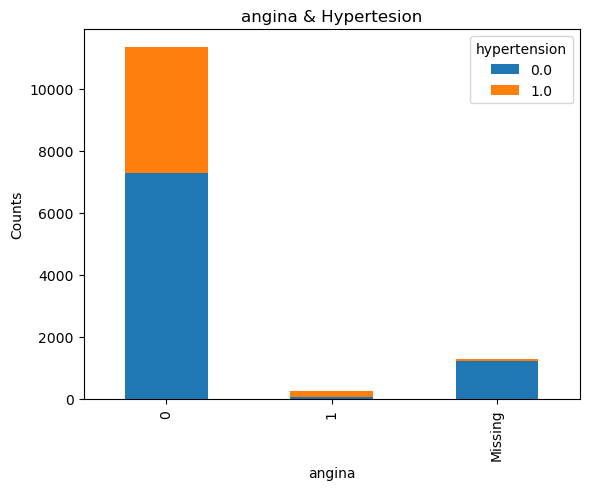

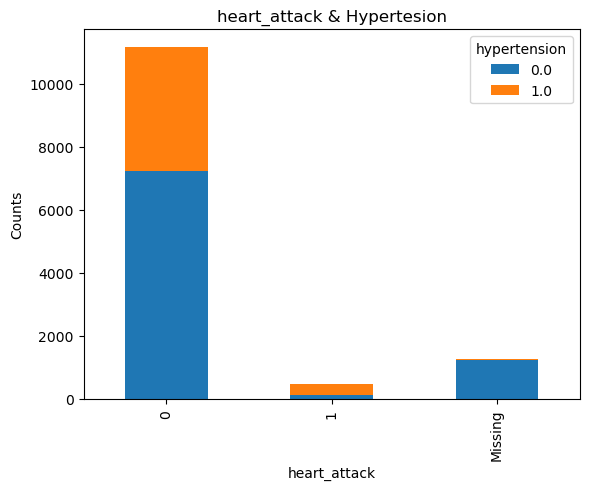

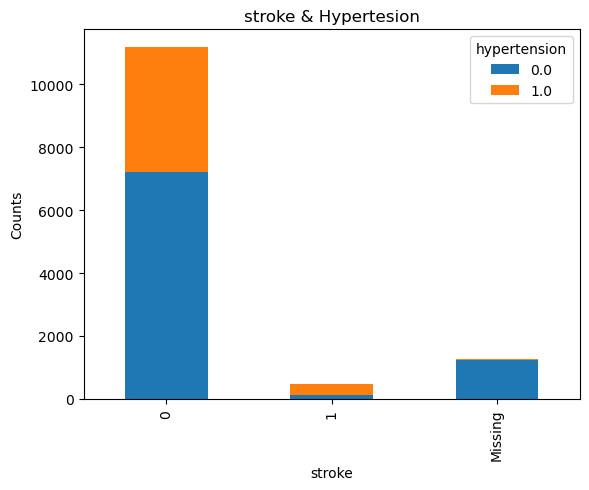

In [327]:
for column in cat_cols:
    pd.crosstab(cat_cols[column], target).plot(kind='bar', stacked=True)
    plt.title('{} & Hypertesion'.format(column))
    plt.xlabel('{}'.format(column))
    plt.ylabel('Counts')
    plt.show();

In [328]:
# get numerical columns
num_cols = df1._get_numeric_data()

In [329]:
num_cols.columns

Index(['weight', 'height', 'BMI', 'waist_circumference', 'hypertension',
       'high_cholesterol', '60_sec_pulse', 'systolic_bp', 'diastolic_bp',
       'gender', 'age', 'diabetes'],
      dtype='object')

In [332]:
num_cols = num_cols.drop(['weight', 'height', 'BMI', 'waist_circumference', 'hypertension',
                         '60_sec_pulse', 'systolic_bp', 'diastolic_bp', 'age'], axis=1)

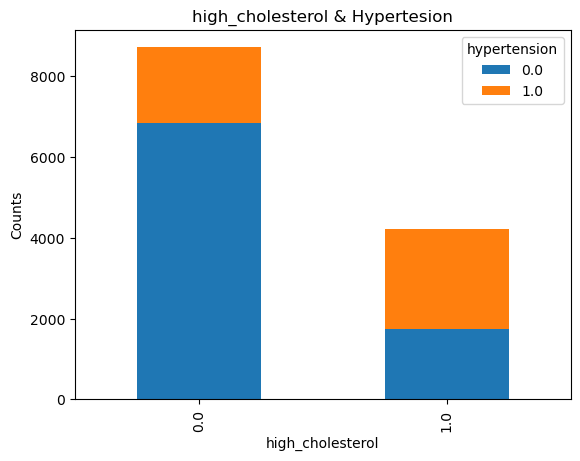

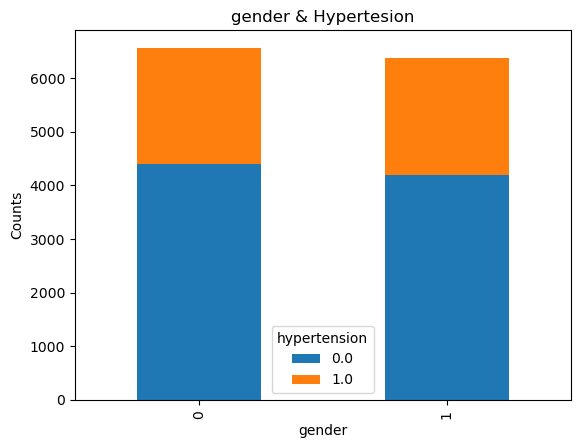

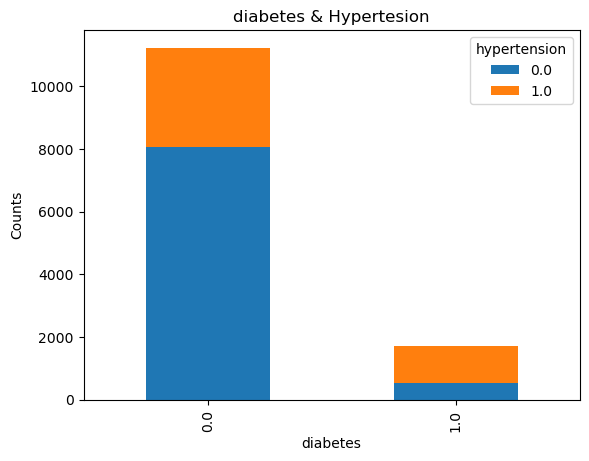

In [333]:
for column in num_cols:
    pd.crosstab(num_cols[column], target).plot(kind='bar', stacked=True)
    plt.title('{} & Hypertesion'.format(column))
    plt.xlabel('{}'.format(column))
    plt.ylabel('Counts')
    plt.show();

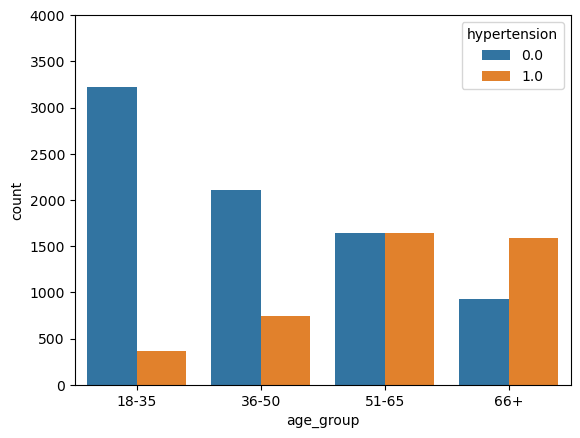

In [339]:
# age vs HTN
df1['age_group'] = pd.cut(df1['age'], [18,35,50,65,80], include_lowest=True, labels=['18-35','36-50','51-65','66+'])
sns.countplot(data=df1, x='age_group', hue='hypertension').set(ylim=(0,4000));

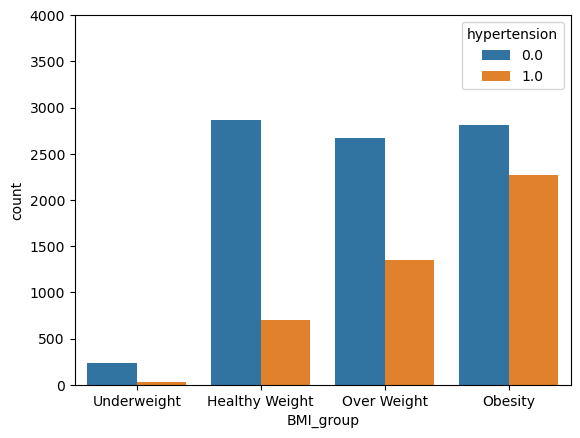

In [348]:
# age vs BMI
df1['BMI_group'] = pd.cut(df1['BMI'], [0,18.5,25,30,70], include_lowest=True, 
                          labels=['Underweight','Normal','Overweight','Obesity'])
sns.countplot(data=df1, x='BMI_group', hue='hypertension').set(ylim=(0,4000));

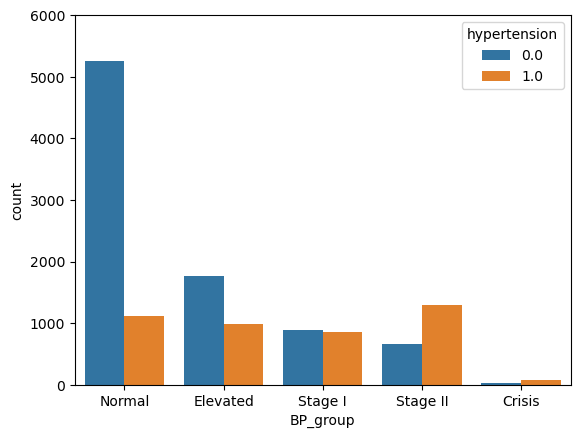

In [352]:
# age vs systolic_bp
df1['SBP_group'] = pd.cut(df1['systolic_bp'], [0,120,130,140,180,200], include_lowest=True, 
                          labels=['Normal','Elevated','Stage I','Stage II','Crisis'])
sns.countplot(data=df1, x='SBP_group', hue='hypertension').set(ylim=(0,6000));

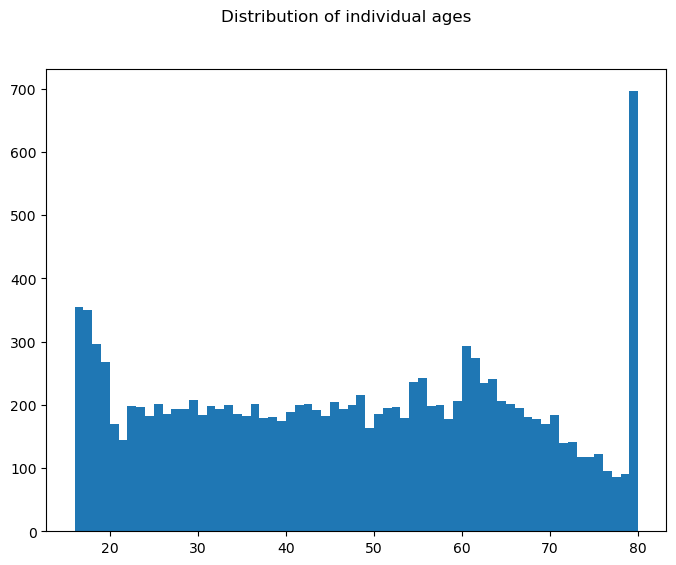

In [353]:
plt.figure(figsize=(8,6))
bins = np.arange(df1['age'].min(), df1['age'].max() + 1)
plt.hist(df1['age'], bins=bins, density=False)
plt.suptitle("Distribution of individual ages");

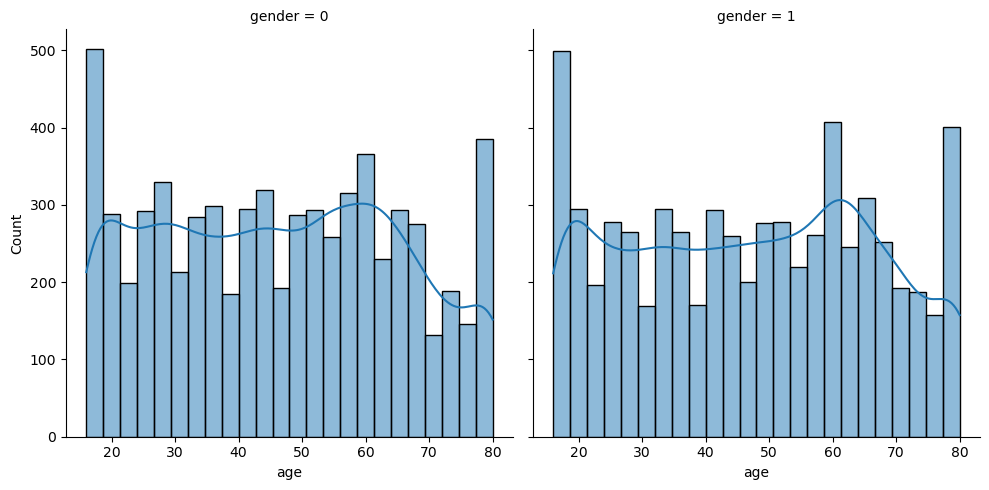

In [354]:
sns.displot(data=df1, x="age", col="gender", kde = True)

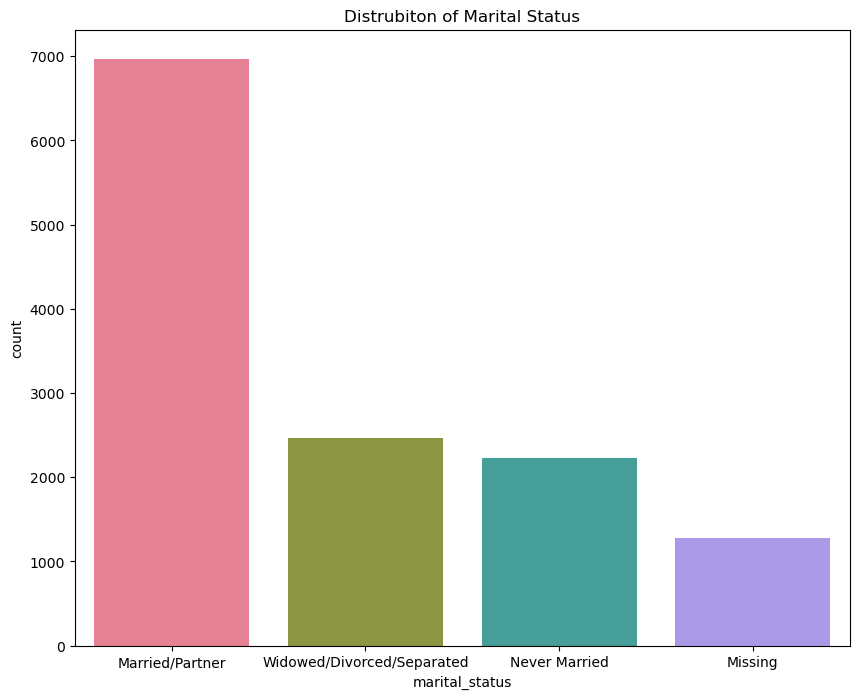

In [355]:
plt.figure(figsize=(10,8))
sns.countplot(x=df1['marital_status'], label='Count', palette='husl')
plt.title("Distrubiton of Marital Status")
plt.show()

In [ ]:
sns.scatterplot(x='SBPReading1',
                y='SBPReading2',
                data=Final_df)
plt.plot([Final_df['SBPReading1'].min(),
          Final_df['SBPReading1'].max()],
          [Final_df['SBPReading1'].min(),
          Final_df['SBPReading1'].max()],
          color='k')
plt.xlabel('Systolic BP - First reading')
plt.ylabel('Systolic BP - Second reading')

### DataFrame 2: Blood Pressure & Cholesterol (BPQ) + Medical Conditions(MCQ) + Demographic data (DEMO) + Blood Pressure(BPX) + Body Measures(BMX) + Diabetes(DIQ) + Medical Conditions(MCQ) + 

In [358]:
files = os.listdir("data/df2")
files

['df_BMX.csv',
 'df_BPQ.csv',
 'df_BPX.csv',
 'df_DEMO.csv',
 'df_DIQ.csv',
 'df_HDL.csv',
 'df_HIQ.csv',
 'df_HUQ.csv',
 'df_MCQ.csv',
 'df_PAQ.csv',
 'df_RXQASA.csv',
 'df_SMQ.csv',
 'df_TCHOL.csv',
 'df_TRIGLY.csv']

In [359]:
df2 = pd.DataFrame()

for file in files:
    df = pd.read_csv("./data/df2/" + file)
    if(df2.size == 0) :
        df2 = df
    else :
        df2 = pd.merge(df2, df, how="outer", on="SEQN")
    print (df2.size)
df2.info()
df2['SEQN'].value_counts() 


104140
204822
274296
434027
459558
485089
510620
536151
663806
868054
893585
995709
1021240
1072302
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 0 to 25530
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SEQN                               25531 non-null  float64
 1   weight                             20828 non-null  float64
 2   height                             20828 non-null  float64
 3   BMI                                20828 non-null  float64
 4   waist_circumference                20828 non-null  float64
 5   hypertension                       16395 non-null  float64
 6   take_HTN_medicine                  16395 non-null  object 
 7   high_cholesterol                   16395 non-null  float64
 8   take_HCL_medicine                  16395 non-null  object 
 9   60_sec_pulse                       16833 non-null  float64
 10  systolic_bp       

83732.0     1
120174.0    1
120170.0    1
120169.0    1
120168.0    1
           ..
109555.0    1
109554.0    1
109553.0    1
109552.0    1
124816.0    1
Name: SEQN, Length: 25531, dtype: int64

In [392]:
# save file
df2.to_csv('./output/df2.csv', index=False)

In [363]:
df2 = df2.set_index('SEQN')

In [364]:
df2.isna().sum()

weight                                4703
height                                4703
BMI                                   4703
waist_circumference                   4703
hypertension                          9136
take_HTN_medicine                     9136
high_cholesterol                      9136
take_HCL_medicine                     9136
60_sec_pulse                          8698
systolic_bp                           8698
diastolic_bp                          8698
gender                                   0
age                                      0
race                                     0
education_level                          0
marital_status                           0
diabetes                               982
HDL                                   7447
insurance                               56
times_receive_healthcare                70
heart_failure                          970
coronary_heart_disease                 970
angina                                 970
heart_attac

In [365]:
df2 = df2.drop(['weight', 'height', 'daily_low-dose_aspirin', 'triglyceride', 'LDL'], axis=1)

In [367]:
df2 = df2.dropna()

In [368]:
df2.shape

(11750, 36)

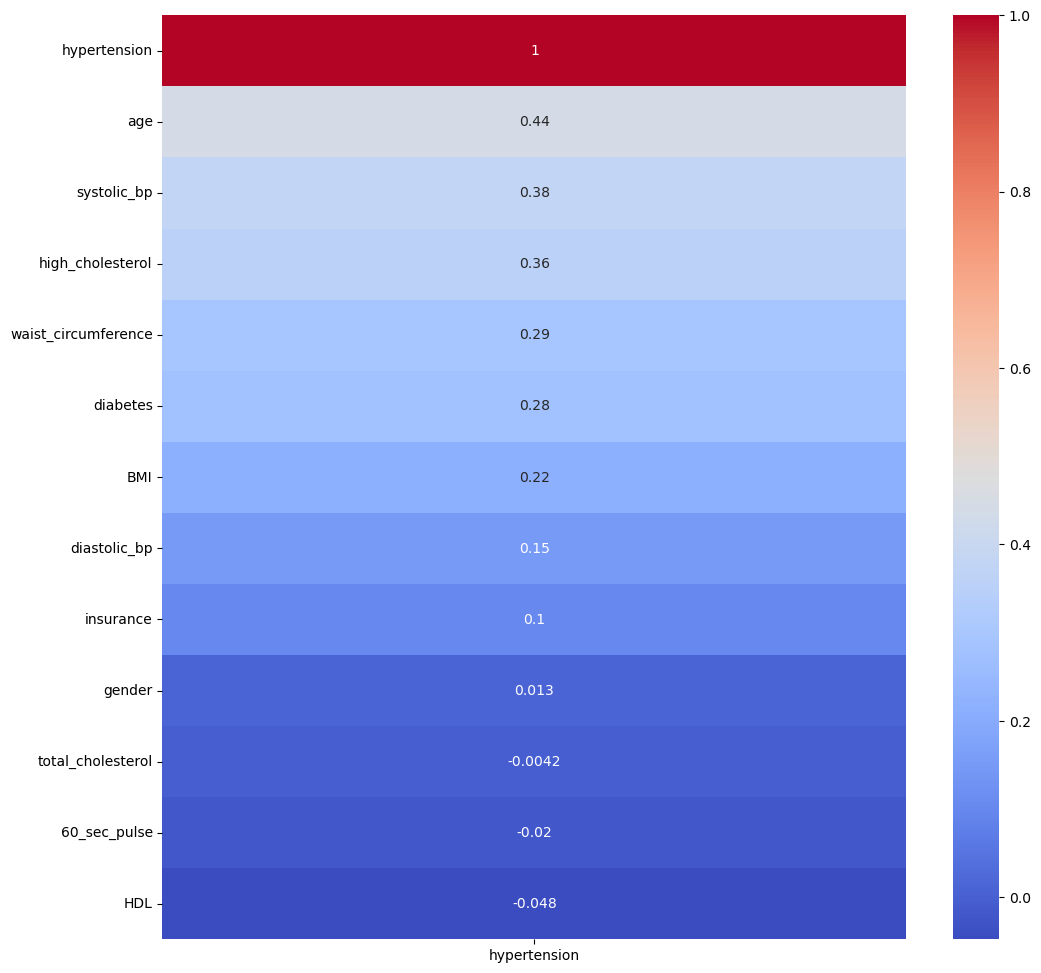

In [369]:
plt.figure(figsize=(12,12))

sns.heatmap(df2.corr()[['hypertension']].sort_values('hypertension', ascending=False), annot=True, cmap='coolwarm');

In [372]:
# get categorical
cat_cols = df2.select_dtypes(include=['object'])

In [373]:
cat_cols.columns

Index(['take_HTN_medicine', 'take_HCL_medicine', 'race', 'education_level',
       'marital_status', 'times_receive_healthcare', 'heart_failure',
       'coronary_heart_disease', 'angina', 'heart_attack', 'stroke',
       'vigorous_activity_work', 'days_vigorous_activity_work',
       'moderate_activity_work', 'days_moderate_activity_work',
       'vigorous_activity_recreation', 'days_vigorous_activity_recreation',
       'moderate_activity_recreation', 'days_moderate_activity_recreation',
       'smoke_100_cigarettes', 'smoke_cigarettes', 'days_smoked_cigs_month',
       'avg_cigs_day'],
      dtype='object')

In [386]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder()
  
# Passing encoded columns
  
enc_data = pd.DataFrame(enc.fit_transform(
    df2[['take_HTN_medicine']]).toarray())

In [389]:
# Merge with main
df2_dum = pd.get_dummies(df2, columns = ['education_level', 'marital_status', 'smoke_cigarettes'])

In [390]:
df2_dum.head()

,BMI,waist_circumference,hypertension,take_HTN_medicine,high_cholesterol,take_HCL_medicine,60_sec_pulse,systolic_bp,diastolic_bp,gender,age,race,diabetes,HDL,insurance,times_receive_healthcare,heart_failure,coronary_heart_disease,angina,heart_attack,stroke,vigorous_activity_work,days_vigorous_activity_work,moderate_activity_work,days_moderate_activity_work,vigorous_activity_recreation,days_vigorous_activity_recreation,moderate_activity_recreation,days_moderate_activity_recreation,smoke_100_cigarettes,days_smoked_cigs_month,avg_cigs_day,total_cholesterol,education_level_9-11th Grade,education_level_College Graduate or Above,education_level_High School,education_level_Less Than 9th Grade,education_level_Missing,education_level_Some College or AA Degree,marital_status_Married/Partner,marital_status_Missing,marital_status_Never Married,marital_status_Widowed/Divorced/Separated,smoke_cigarettes_Every day,smoke_cigarettes_Missing,smoke_cigarettes_Not at all,smoke_cigarettes_Some days
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732.0,27.8,101.1,0.0,Missing,0.0,Missing,76.0,122.67,65.33,1,62.0,White,1.0,46.0,1.0,8_to_9,0,0,0,0,0,0,Missing,1,5.0,0,Missing,1,6.0,1,Missing,Missing,173.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
83733.0,30.8,107.9,0.0,Missing,0.0,Missing,72.0,140.00,86.00,1,53.0,White,0.0,63.0,0.0,None,0,0,0,0,0,0,Missing,0,Missing,0,Missing,0,Missing,1,30.0,20.0,265.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
83734.0,28.8,116.5,1.0,1,1.0,0,56.0,135.33,45.33,1,78.0,White,1.0,30.0,1.0,2_to_3,0,0,0,1,0,0,Missing,1,4.0,0,Missing,0,Missing,1,Missing,Missing,229.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
83735.0,42.4,110.1,0.0,Missing,0.0,Missing,78.0,134.00,70.00,0,56.0,White,0.0,61.0,1.0,6_to_7,0,0,0,0,0,0,Missing,1,5.0,0,Missing,0,Missing,0,Missing,Missing,174.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
83736.0,20.3,80.4,0.0,Missing,0.0,Missing,76.0,104.00,60.00,0,42.0,Black,0.0,53.0,1.0,2_to_3,0,0,0,0,0,0,Missing,1,7.0,0,Missing,0,Missing,0,Missing,Missing,204.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


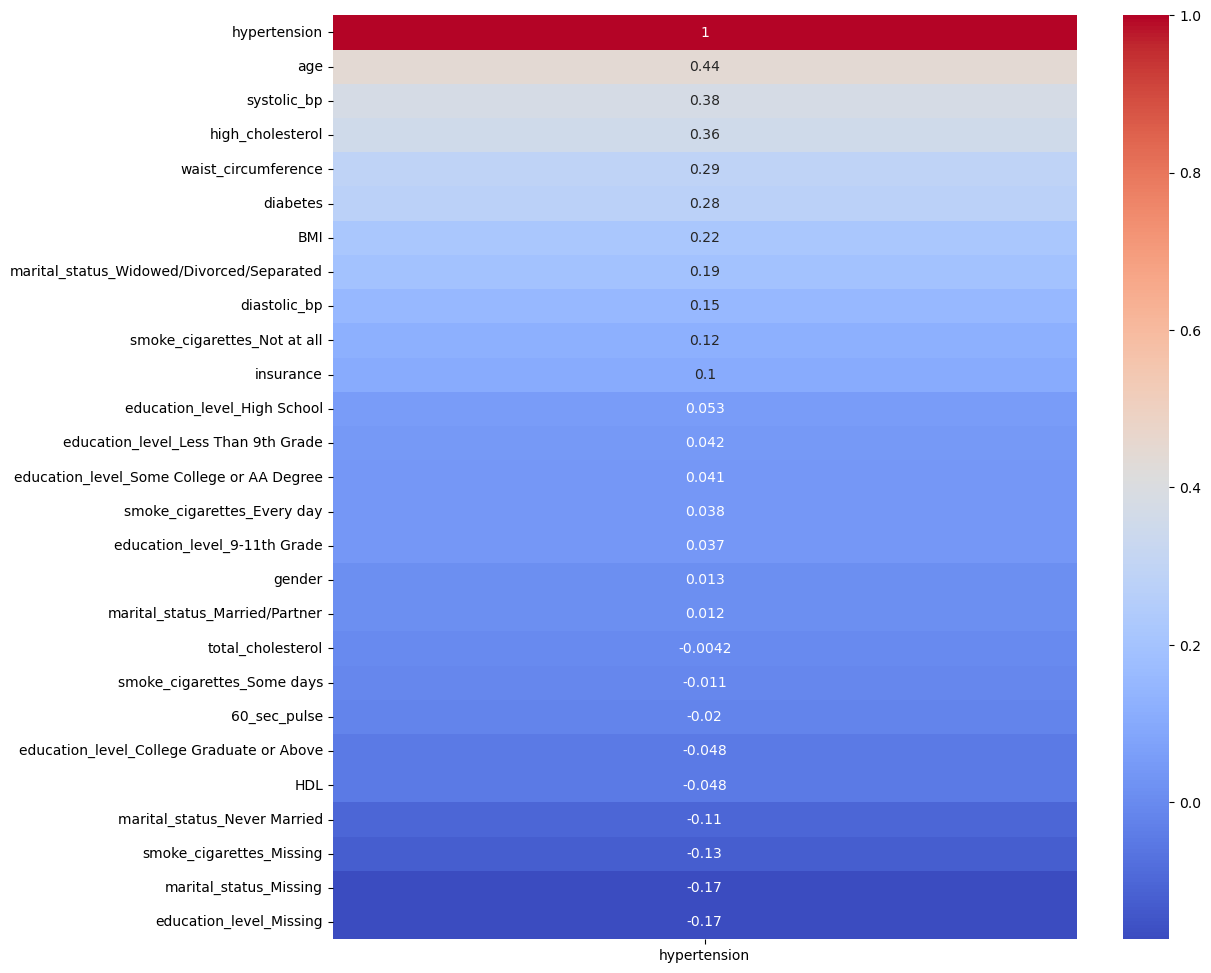

In [391]:
plt.figure(figsize=(12,12))

sns.heatmap(df2_dum.corr()[['hypertension']].sort_values('hypertension', ascending=False), annot=True, cmap='coolwarm');

### DataFrame 3: Blood Pressure & Cholesterol (BPQ) + Medical Conditions(MCQ) + Demographic data (DEMO) + Blood Pressure(BPX) + Body Measures(BMX) + Diabetes(DIQ) + Medical Conditions(MCQ) + 

In [286]:
files = os.listdir("data/df3")
files

['df_BIOPRO.csv',
 'df_BMX.csv',
 'df_BPQ.csv',
 'df_BPX.csv',
 'df_DEMO.csv',
 'df_DIQ.csv',
 'df_HDL.csv',
 'df_HIQ.csv',
 'df_HUQ.csv',
 'df_MCQ.csv',
 'df_PAQ.csv',
 'df_RXQASA.csv',
 'df_SMQ.csv',
 'df_TCHOL.csv',
 'df_TRIGLY.csv',
 'df_WHQ.csv']

In [287]:
df3 = pd.DataFrame()

for file in files:
    df = pd.read_csv("./data/df3/" + file)
    if(df3.size == 0) :
        df3 = df
    else :
        df3 = pd.merge(df3, df, how="outer", on="SEQN")
    print (df3.size)
df3.info()
df3['SEQN'].value_counts() 


372072
604464
729696
800695
1021240
1046771
1072302
1097833
1123364
1251019
1455267
1480798
1582922
1608453
1659515
2221197
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 0 to 25530
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SEQN                               25531 non-null  float64
 1   albumin                            15503 non-null  float64
 2   ALT                                15503 non-null  float64
 3   AST                                15503 non-null  float64
 4   ALP                                15503 non-null  float64
 5   BUN                                15503 non-null  float64
 6   calcium                            15503 non-null  float64
 7   bicarbonate                        15503 non-null  float64
 8   creatinine                         15503 non-null  float64
 9   GGT                                15503 non-null  float64

83732.0     1
90263.0     1
90252.0     1
90251.0     1
90246.0     1
           ..
113088.0    1
113087.0    1
113084.0    1
113083.0    1
124816.0    1
Name: SEQN, Length: 25531, dtype: int64

In [228]:
# save file
df3.to_csv('./output/df3.csv', index=False)

In [288]:
df3.isna().sum()

SEQN                                     0
albumin                              10028
ALT                                  10028
AST                                  10028
ALP                                  10028
BUN                                  10028
calcium                              10028
bicarbonate                          10028
creatinine                           10028
GGT                                  10028
glucose                              10028
iron                                 10028
LHD                                  10028
phosphorus                           10028
bilirubin                            10028
total_protein                        10028
uric_acid                            10028
sodium                               10028
potassium                            10028
chloride                             10028
osmolality                           10028
globulin                             10028
cholesterol                          10028
triglycerid

In [289]:
df3 = df3.dropna()

In [290]:
df3.shape

(3220, 87)

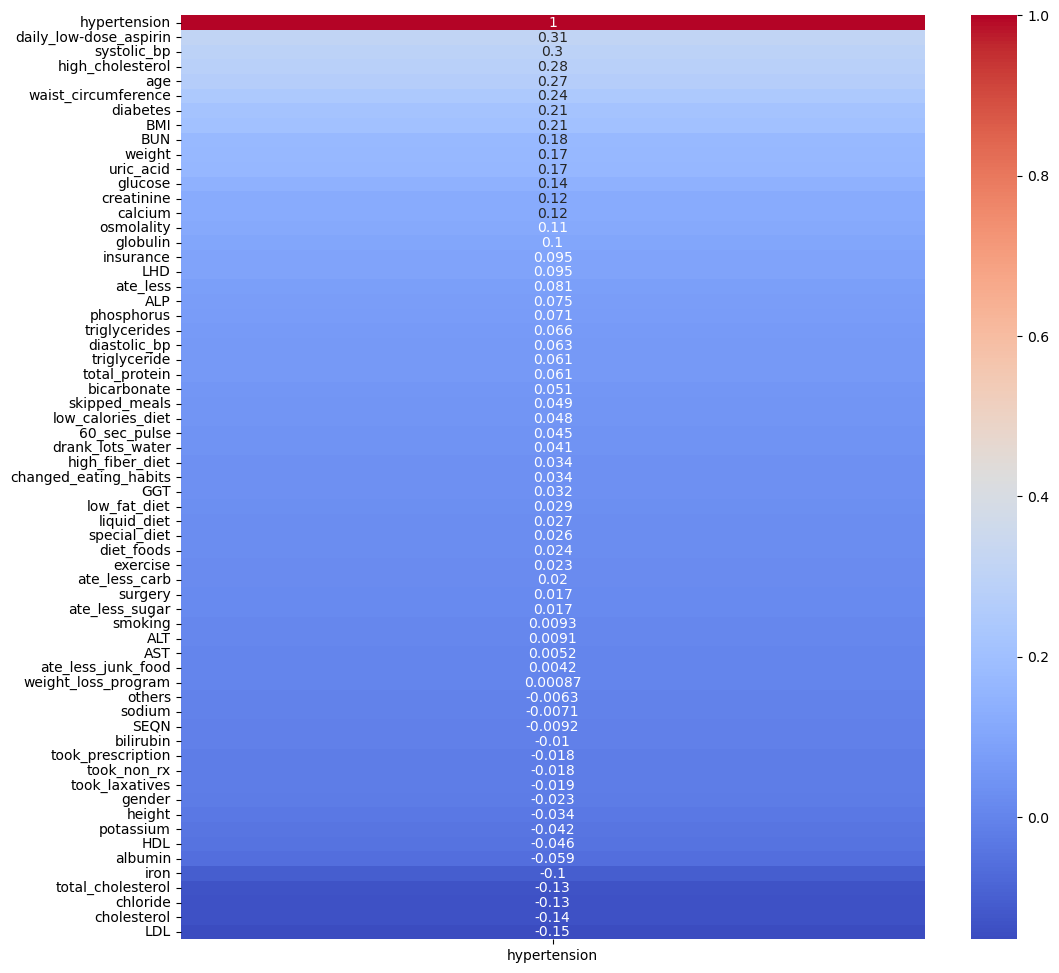

In [357]:
plt.figure(figsize=(12,12))

sns.heatmap(df3.corr()[['hypertension']].sort_values('hypertension', ascending=False), annot=True, cmap='coolwarm');

C:\Users\skyne\AppData\Local\Temp\ipykernel_15964\2887746006.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df3.hist(ax=ax, grid=False, bins=10, color='green')


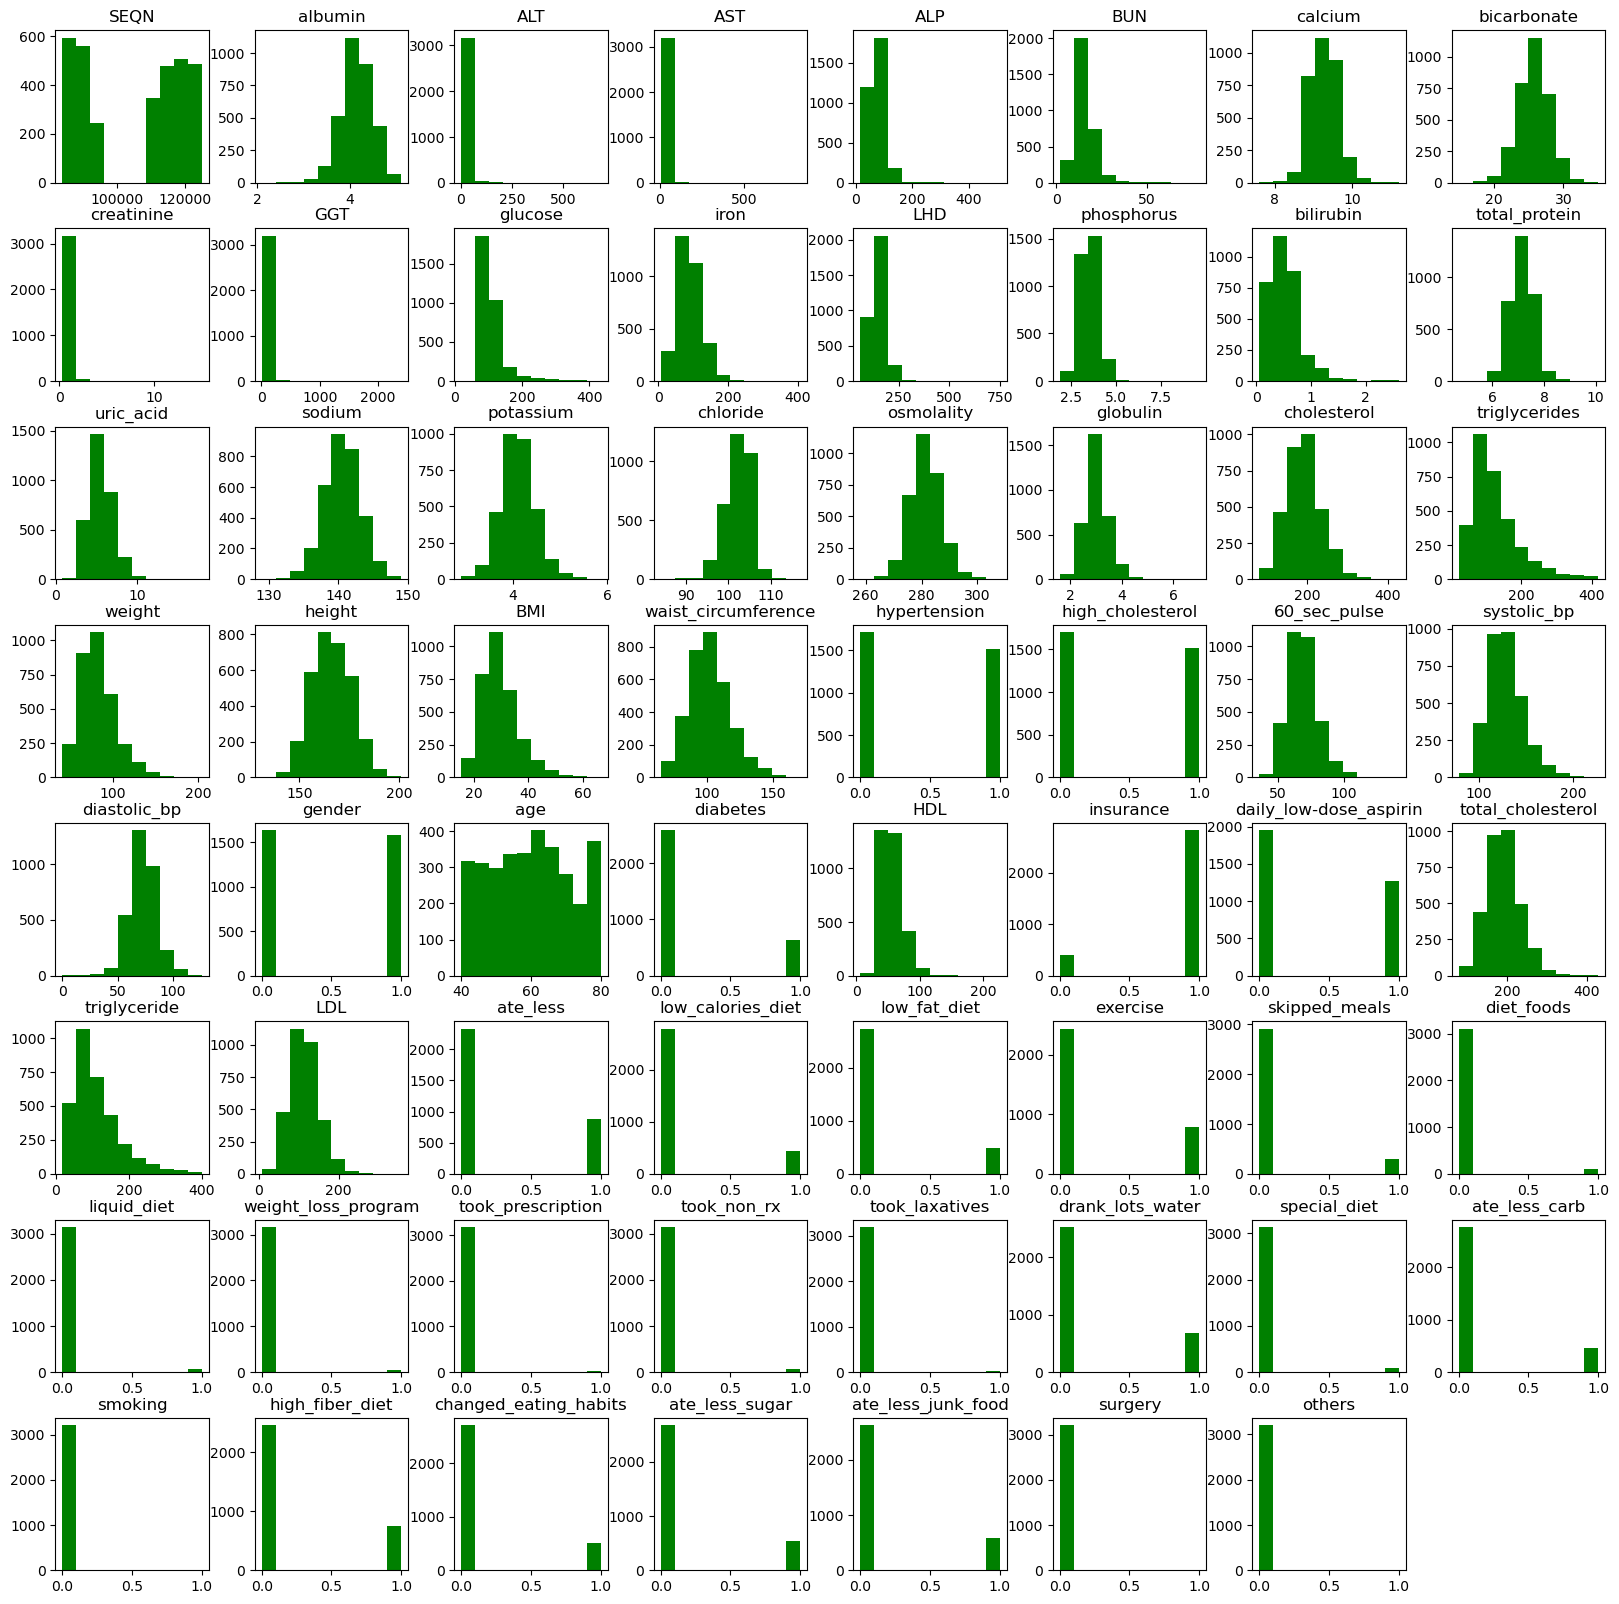

In [234]:
#Histograms - variables
fig = plt.figure(figsize = (20,20))
plt.title("Histogram of each feature")
ax = fig.gca()
df3.hist(ax=ax, grid=False, bins=10, color='green')
plt.show()

In [261]:
# get categorical
cat_cols = df3.select_dtypes(include=['object'])

In [263]:
cat_cols.columns

Index(['take_HTN_medicine', 'take_HCL_medicine', 'race', 'education_level',
       'marital_status', 'times_receive_healthcare', 'heart_failure',
       'coronary_heart_disease', 'angina', 'heart_attack', 'stroke',
       'vigorous_activity_work', 'days_vigorous_activity_work',
       'moderate_activity_work', 'days_moderate_activity_work',
       'vigorous_activity_recreation', 'days_vigorous_activity_recreation',
       'moderate_activity_recreation', 'days_moderate_activity_recreation',
       'smoke_100_cigarettes', 'smoke_cigarettes', 'days_smoked_cigs_month',
       'avg_cigs_day', 'tried_lose_weight'],
      dtype='object')

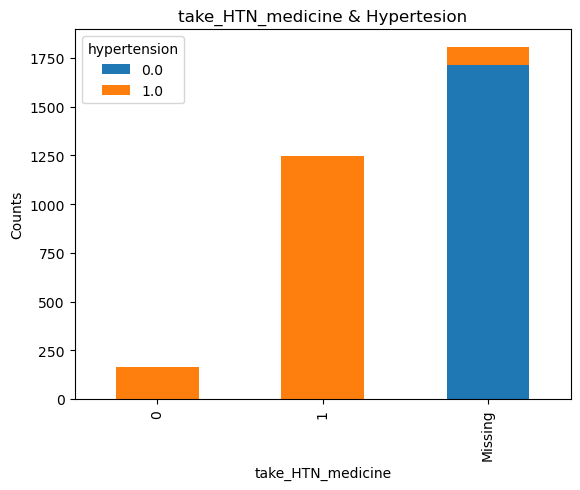

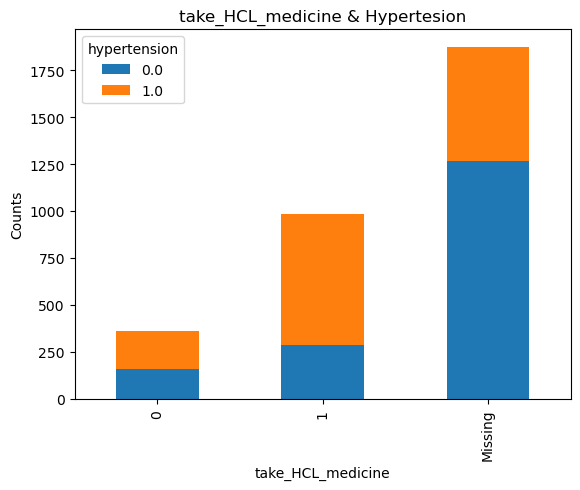

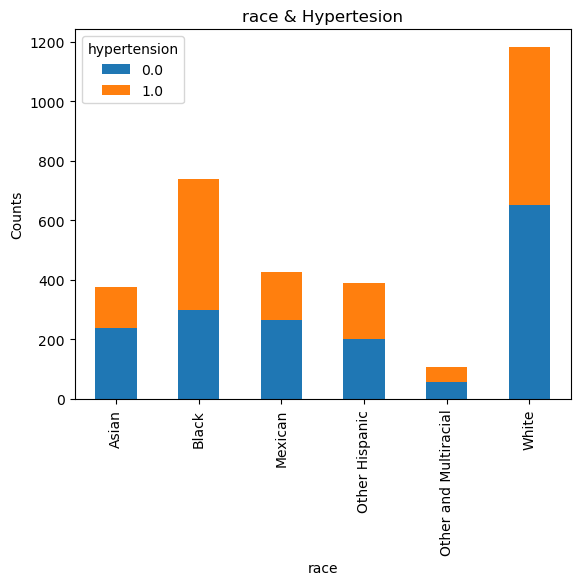

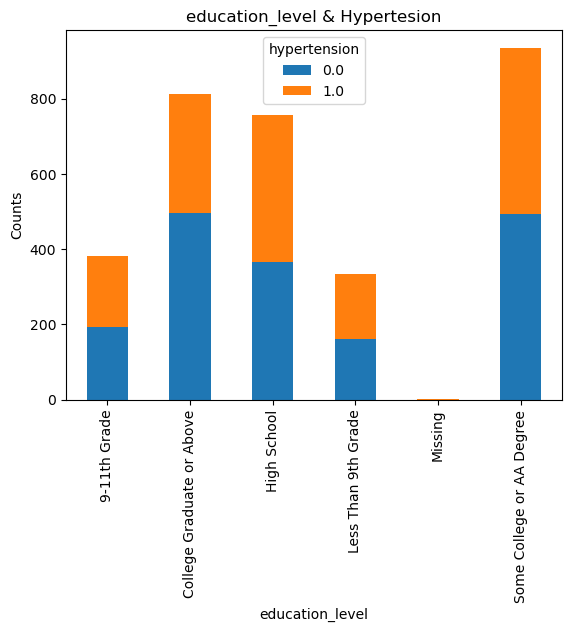

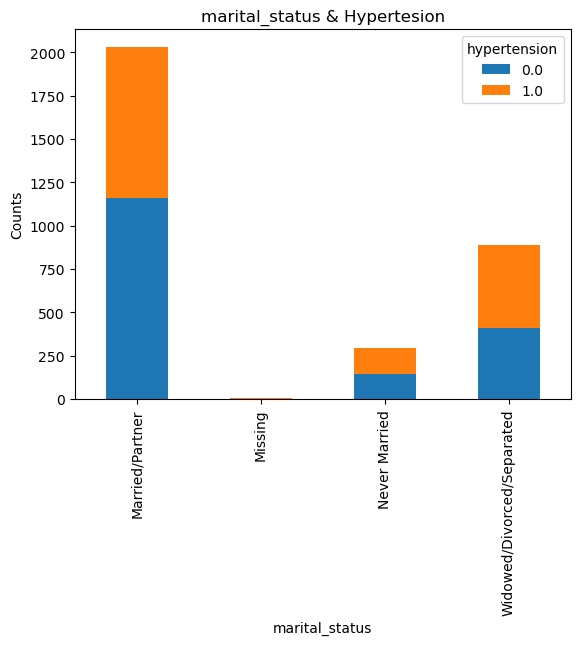

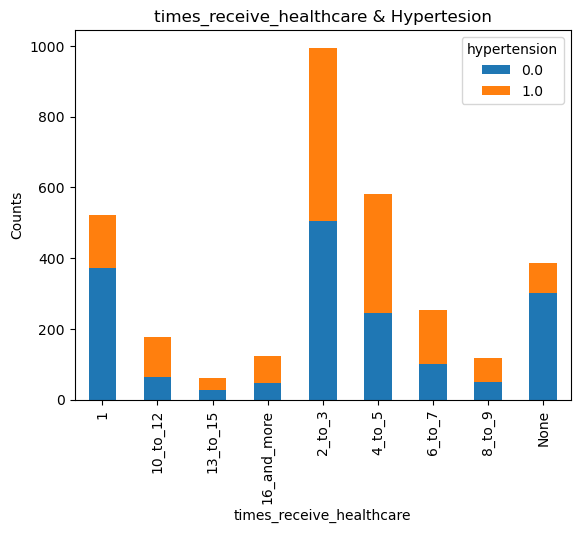

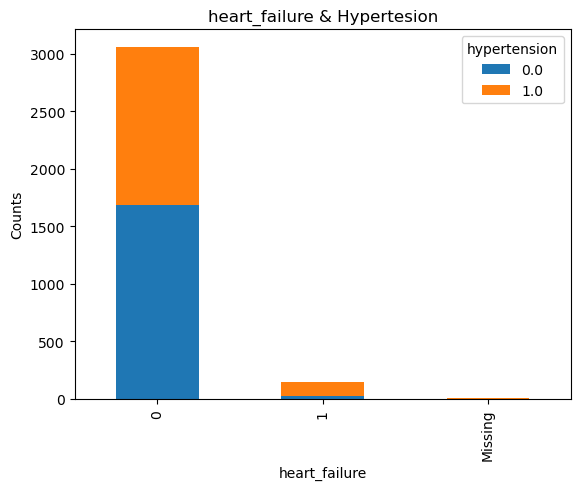

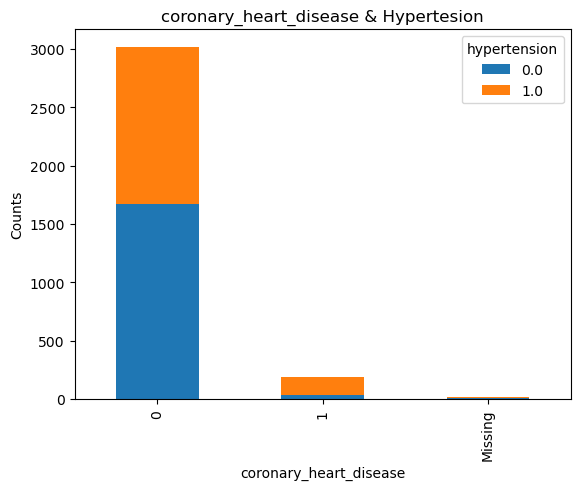

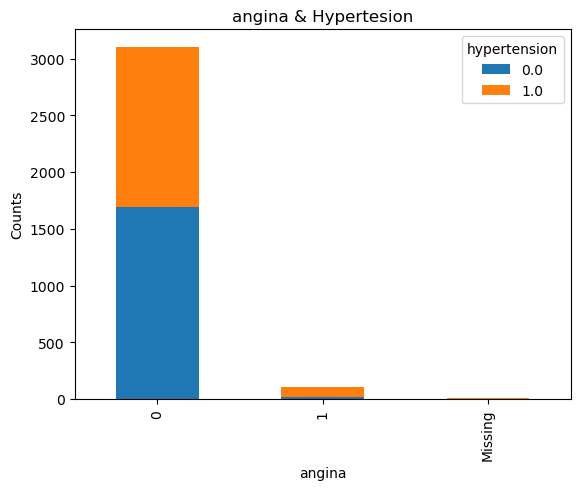

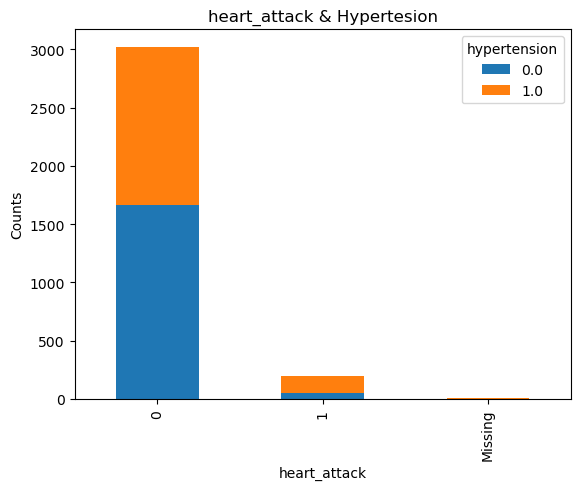

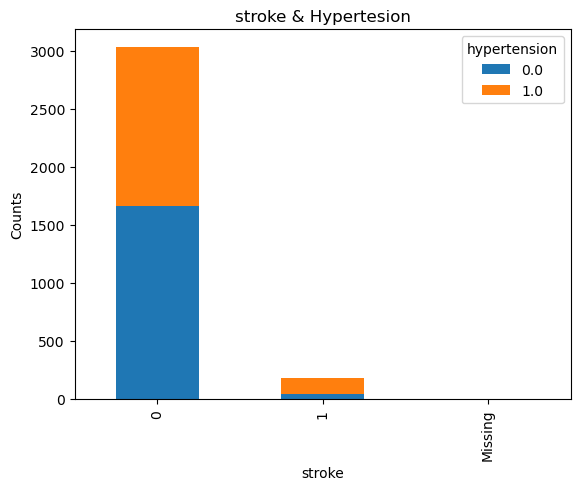

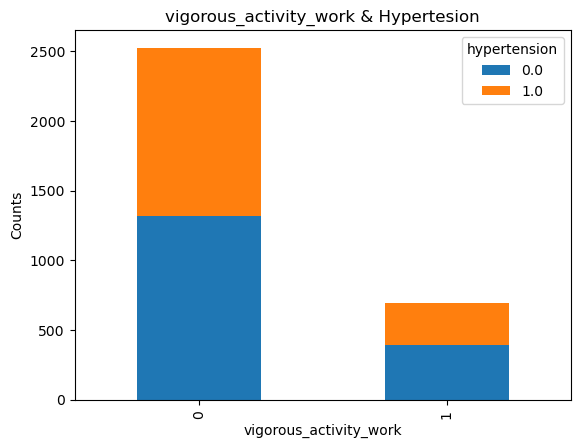

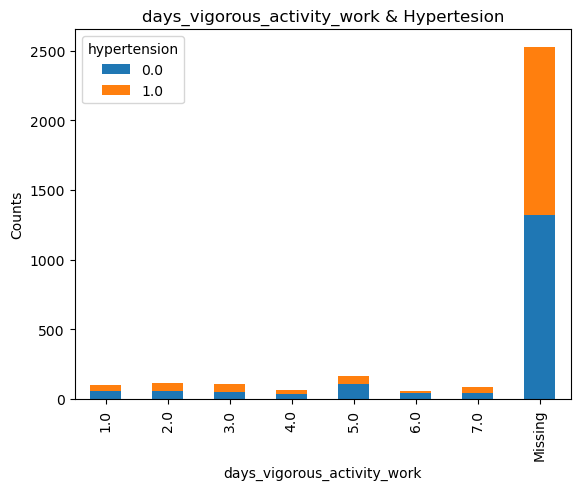

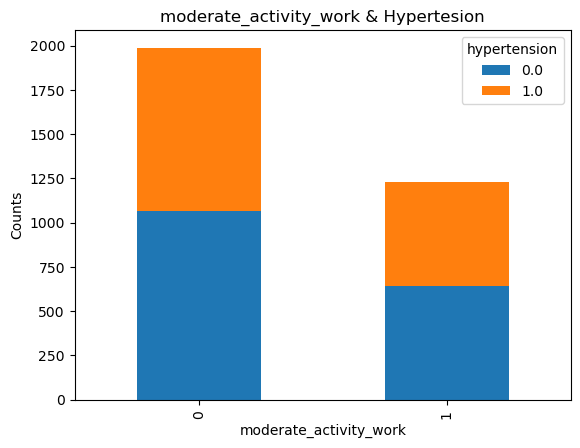

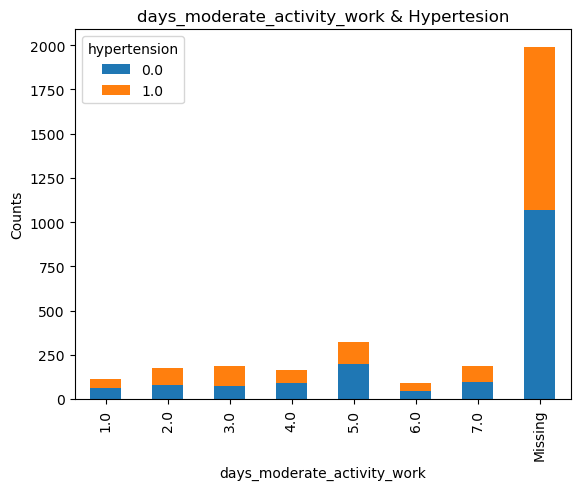

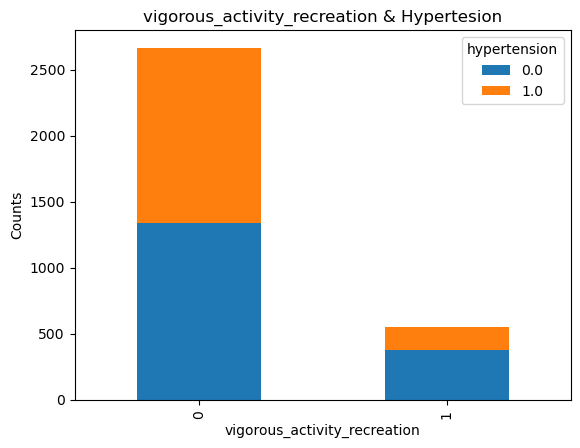

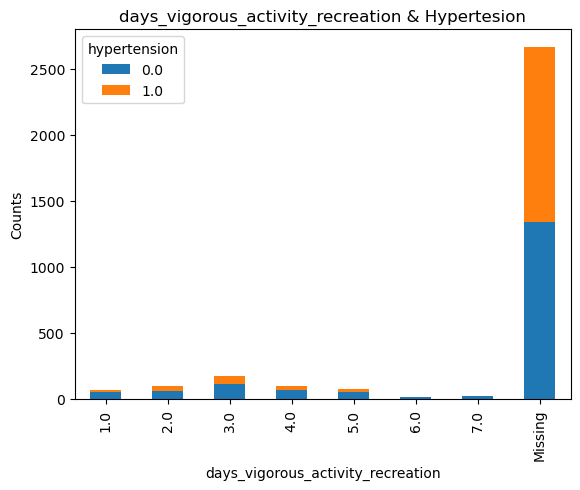

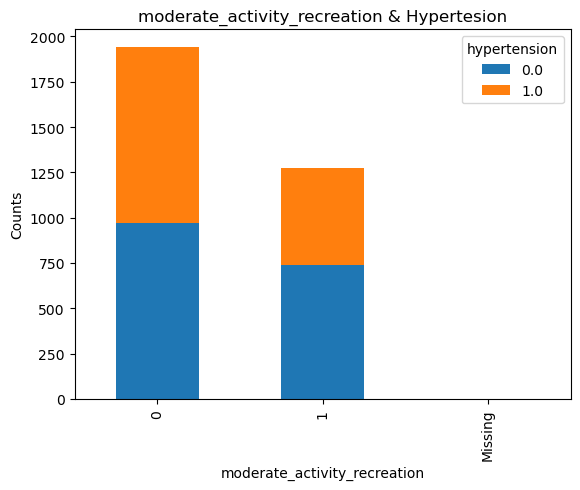

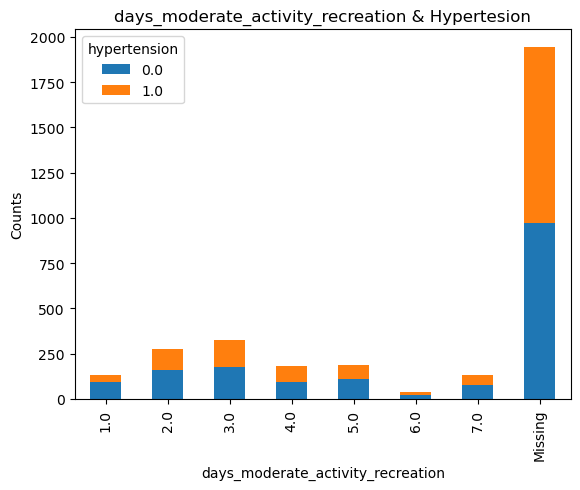

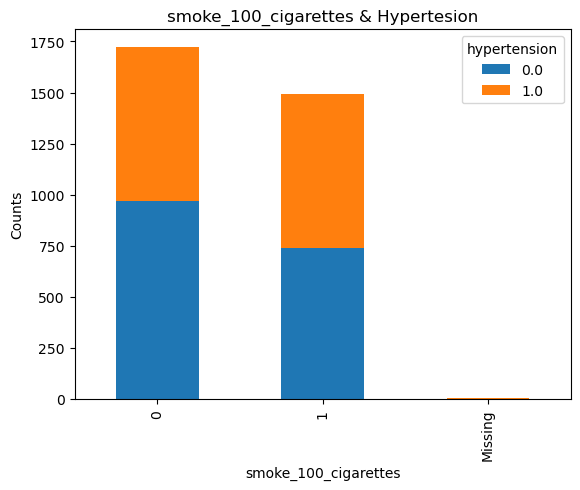

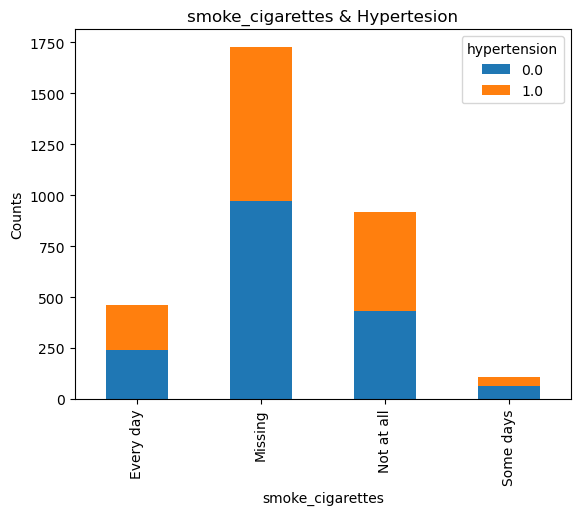

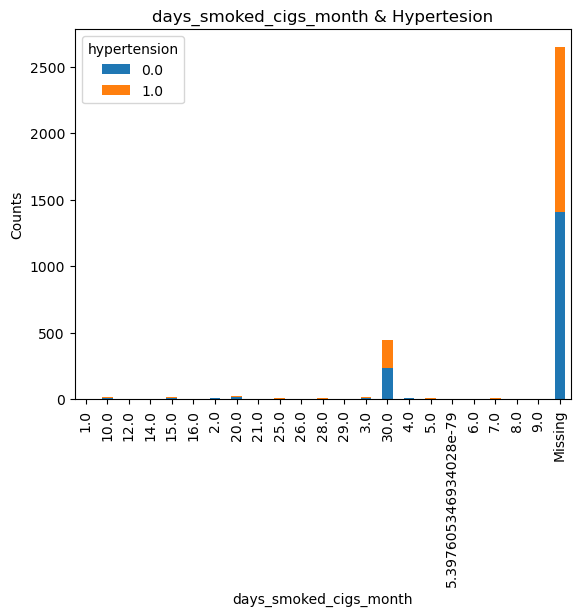

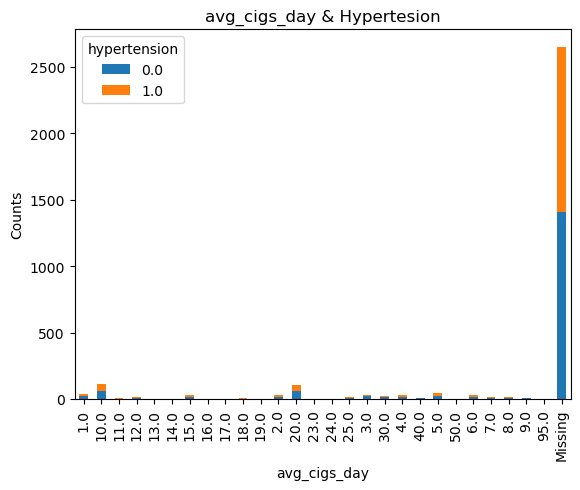

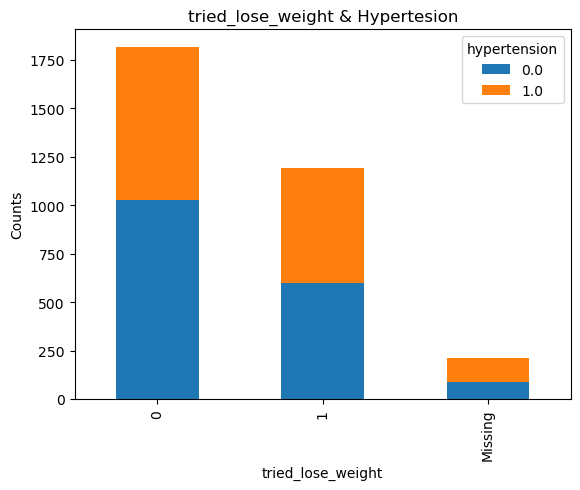

In [262]:
for column in cat_cols:
    pd.crosstab(cat_cols[column], target).plot(kind='bar', stacked=True)
    plt.title('{} & Hypertesion'.format(column))
    plt.xlabel('{}'.format(column))
    plt.ylabel('Counts')
    plt.show();

In [264]:
# get numerical columns
df3._get_numeric_data()

,albumin,ALT,AST,ALP,BUN,calcium,bicarbonate,creatinine,GGT,glucose,iron,LHD,phosphorus,bilirubin,total_protein,uric_acid,sodium,potassium,chloride,osmolality,globulin,cholesterol,triglycerides,weight,height,BMI,waist_circumference,hypertension,high_cholesterol,60_sec_pulse,systolic_bp,diastolic_bp,gender,age,diabetes,HDL,insurance,daily_low-dose_aspirin,total_cholesterol,triglyceride,LDL,ate_less,low_calories_diet,low_fat_diet,exercise,skipped_meals,diet_foods,liquid_diet,weight_loss_program,took_prescription,took_non_rx,took_laxatives,drank_lots_water,special_diet,ate_less_carb,smoking,high_fiber_diet,changed_eating_habits,ate_less_sugar,ate_less_junk_food,surgery,others
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83733.0,4.5,35.0,31.0,47.0,10.0,9.8,27.0,1.05,75.0,94.0,161.0,108.0,4.4,0.6,7.4,7.0,140.0,4.55,103.0,278.0,2.9,267.0,170.0,90.4,171.4,30.8,107.9,0.0,0.0,72.00,140.00,86.00,1,53.0,0.0,63.0,0.0,1.0,265.0,147.0,173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83734.0,4.5,29.0,30.0,46.0,26.0,9.7,24.0,1.12,11.0,103.0,72.0,151.0,3.6,0.5,7.3,7.3,140.0,4.70,106.0,284.0,2.8,236.0,299.0,83.4,170.1,28.8,116.5,1.0,1.0,56.00,135.33,45.33,1,78.0,1.0,30.0,1.0,1.0,229.0,269.0,145.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
83736.0,4.3,13.0,20.0,46.0,12.0,9.3,24.0,0.64,23.0,83.0,44.0,93.0,3.2,0.3,7.7,3.3,136.0,3.50,99.0,270.0,3.4,202.0,52.0,55.2,164.9,20.3,80.4,0.0,0.0,76.00,104.00,60.00,0,42.0,0.0,53.0,1.0,0.0,204.0,47.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83737.0,4.1,17.0,22.0,83.0,25.0,9.3,25.0,1.15,16.0,97.0,75.0,145.0,3.7,0.5,7.1,4.9,140.0,4.20,106.0,284.0,3.0,195.0,52.0,64.4,150.0,28.6,92.9,0.0,0.0,64.00,119.33,58.67,0,72.0,0.0,78.0,0.0,0.0,190.0,46.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83750.0,4.6,87.0,62.0,54.0,17.0,9.3,26.0,0.81,24.0,80.0,107.0,174.0,3.9,0.7,7.4,5.4,138.0,3.91,104.0,276.0,2.8,186.0,63.0,76.2,177.8,24.1,90.1,0.0,1.0,64.00,110.67,72.00,1,45.0,0.0,50.0,0.0,0.0,181.0,52.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124810.0,3.8,24.0,21.0,112.0,9.0,8.5,26.0,0.68,33.0,122.0,102.0,190.0,3.2,0.5,7.5,5.3,143.0,4.10,103.0,285.0,3.7,212.0,192.0,116.9,167.4,41.7,120.0,1.0,1.0,79.00,130.67,85.00,0,56.0,0.0,37.0,1.0,0.0,211.0,176.0,139.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124812.0,3.7,97.0,75.0,110.0,11.0,8.9,26.0,0.46,79.0,96.0,104.0,234.0,2.8,0.4,7.4,5.3,138.0,3.00,97.0,275.0,3.7,219.0,119.0,73.0,159.6,28.7,99.3,1.0,0.0,74.00,166.00,91.00,0,62.0,0.0,66.0,0.0,0.0,223.0,101.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124813.0,4.2,13.0,14.0,59.0,12.0,9.0,25.0,0.67,18.0,93.0,95.0,176.0,3.8,0.4,7.5,4.6,144.0,4.00,105.0,286.0,3.3,157.0,60.0,78.6,168.5,27.7,98.5,0.0,0.0,56.00,126.00,84.67,0,43.0,0.0,52.0,1.0,0.0,157.0,45.0,96.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [276]:
# get numerical columns
num_cols = df3._get_numeric_data()

In [277]:
num_cols = num_cols.drop(['albumin', 'ALT', 'AST', 'ALP', 'BUN', 'calcium', 'bicarbonate',
       'creatinine', 'GGT', 'glucose', 'iron', 'LHD', 'phosphorus', 'hypertension',
       'bilirubin', 'total_protein', 'uric_acid', 'sodium', 'potassium',
       'chloride', 'osmolality', 'globulin', 'cholesterol', 'triglycerides',
       'weight', 'height', 'BMI', 'waist_circumference', '60_sec_pulse', 'systolic_bp', 'diastolic_bp',
       'age', 'HDL', 'total_cholesterol', 'triglyceride', 'LDL'], axis=1)

In [279]:
num_cols.columns

Index(['high_cholesterol', 'gender', 'diabetes', 'insurance',
       'daily_low-dose_aspirin', 'ate_less', 'low_calories_diet',
       'low_fat_diet', 'exercise', 'skipped_meals', 'diet_foods',
       'liquid_diet', 'weight_loss_program', 'took_prescription',
       'took_non_rx', 'took_laxatives', 'drank_lots_water', 'special_diet',
       'ate_less_carb', 'smoking', 'high_fiber_diet', 'changed_eating_habits',
       'ate_less_sugar', 'ate_less_junk_food', 'surgery', 'others'],
      dtype='object')

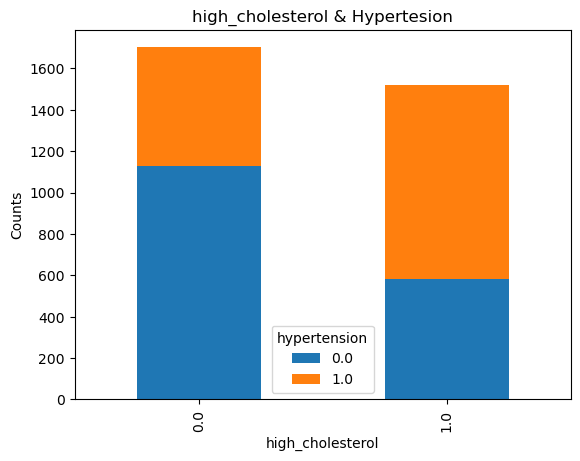

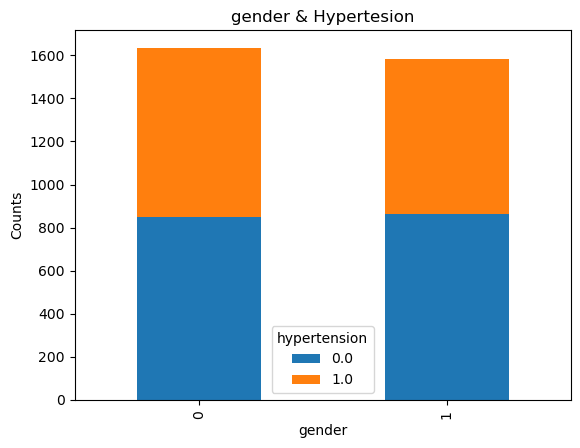

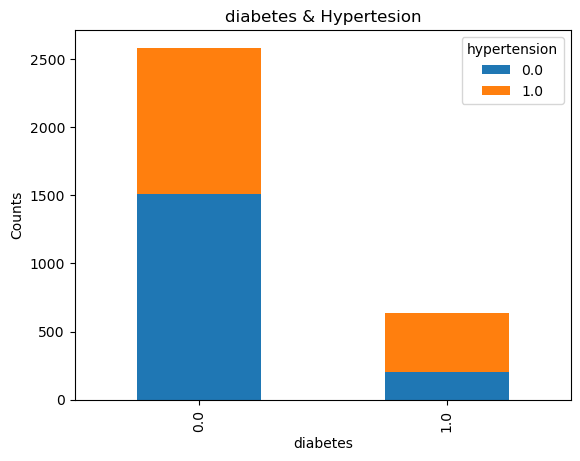

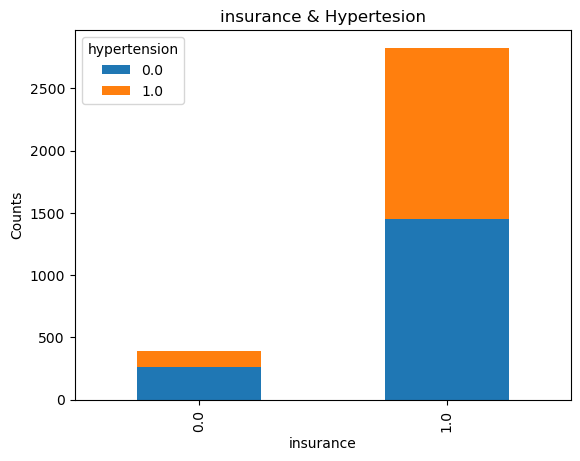

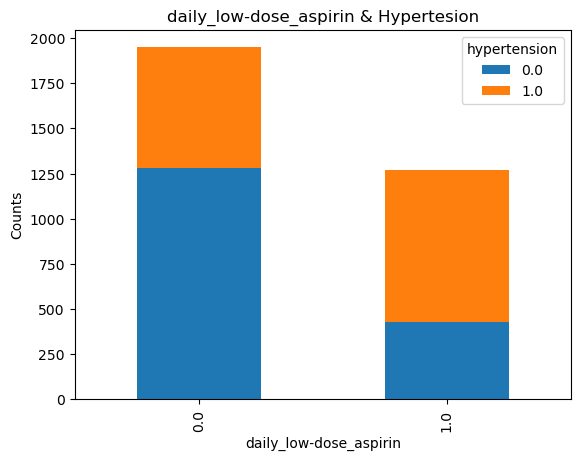

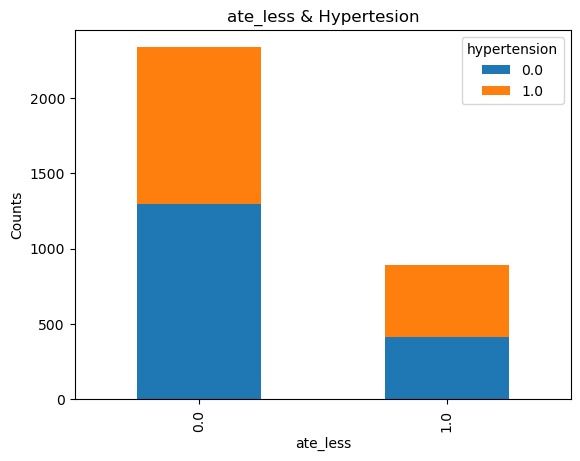

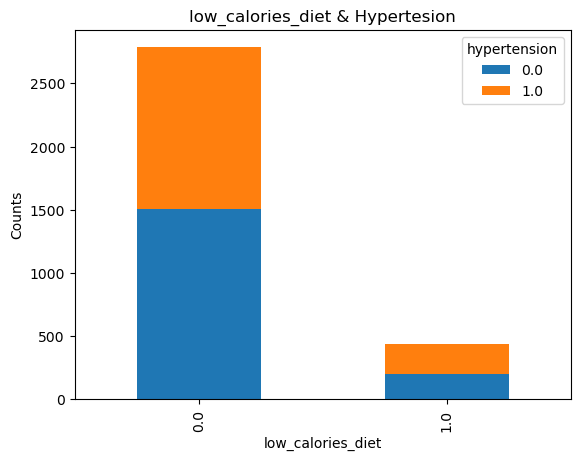

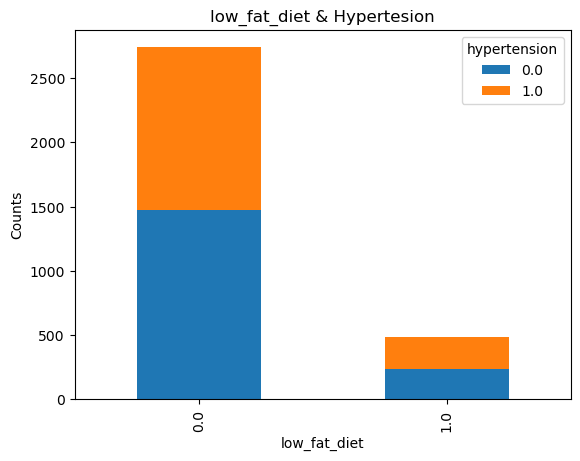

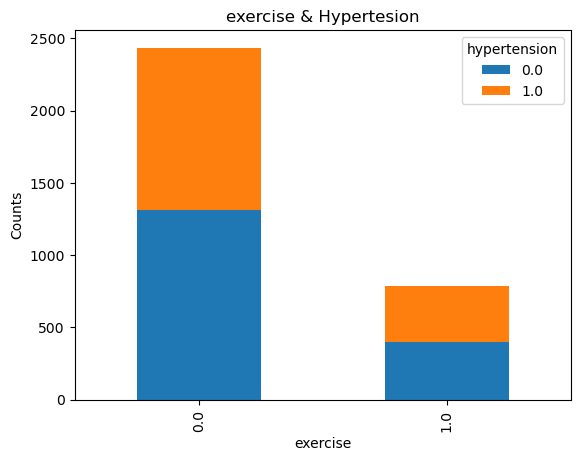

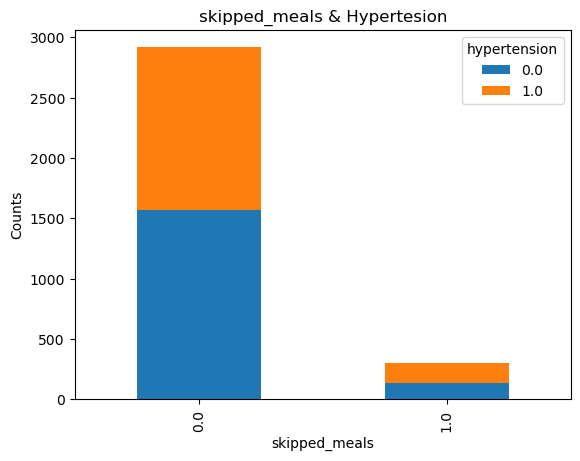

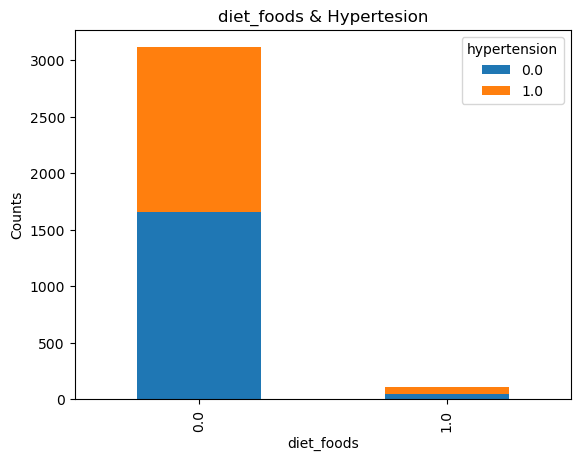

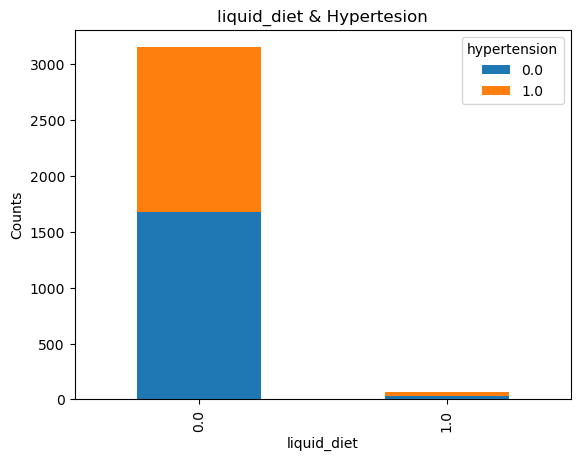

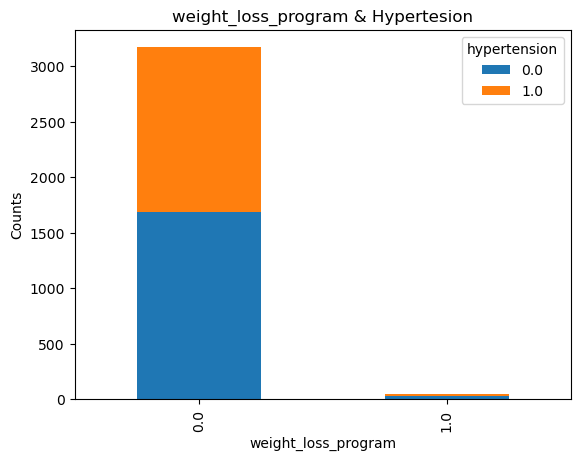

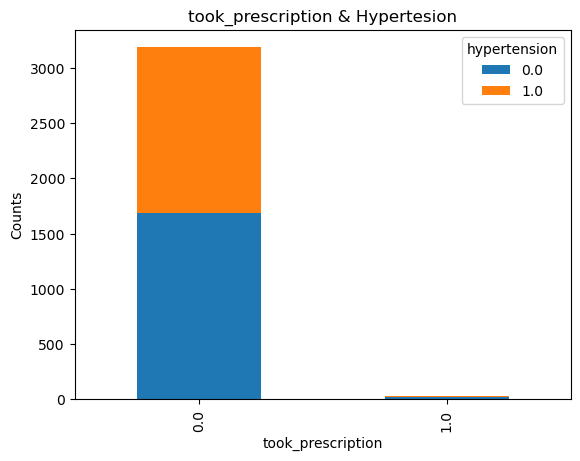

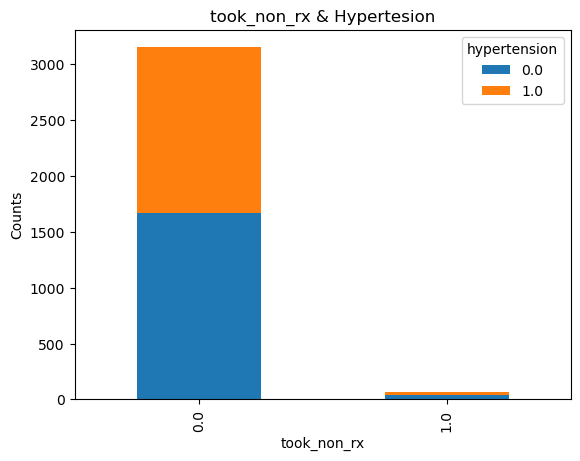

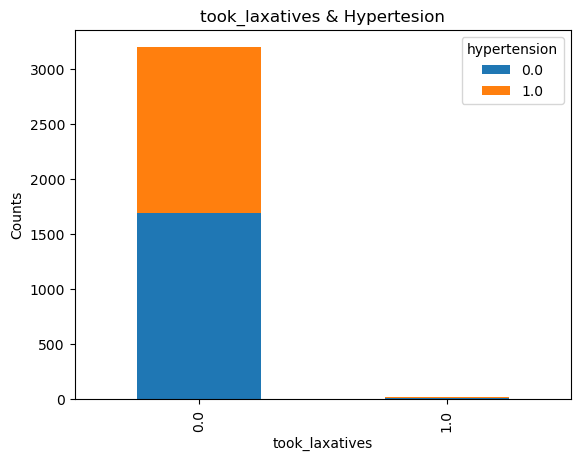

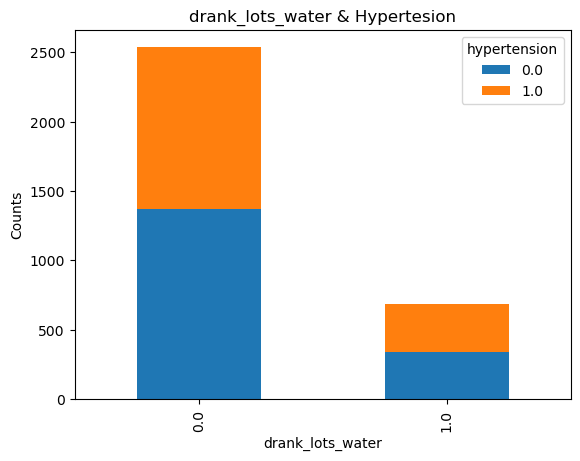

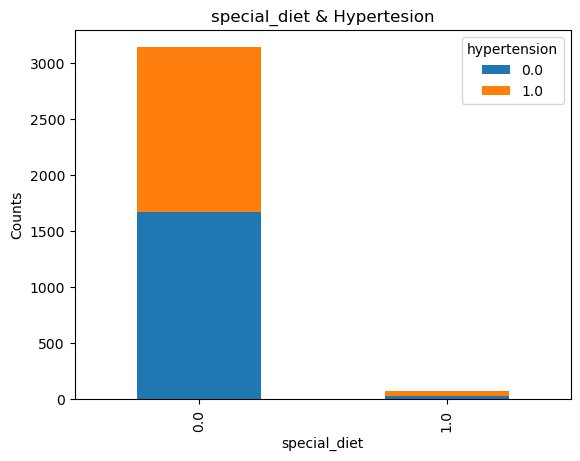

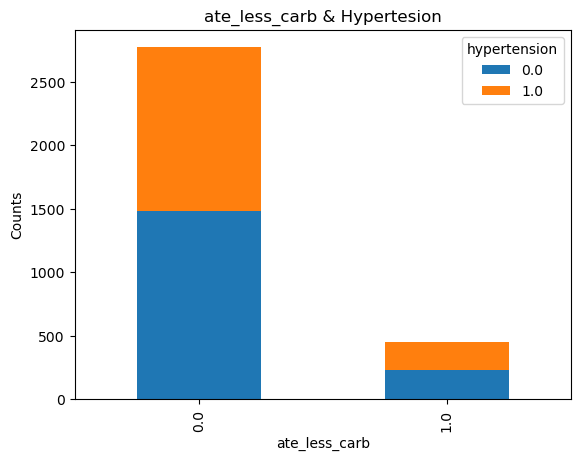

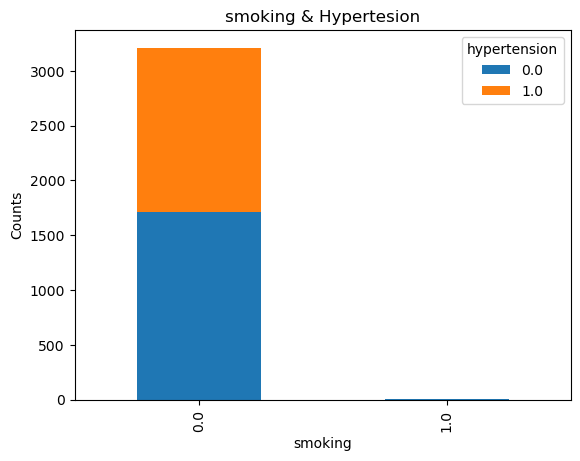

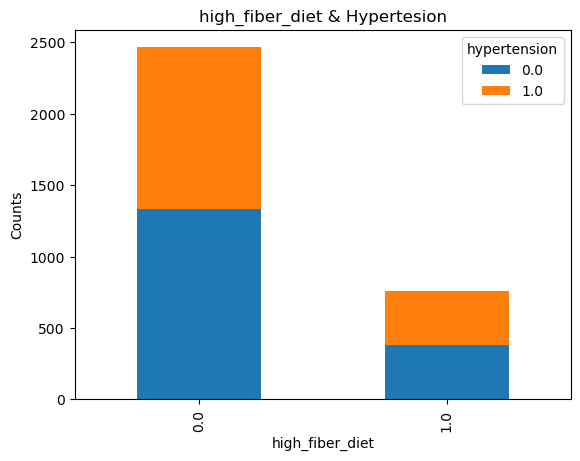

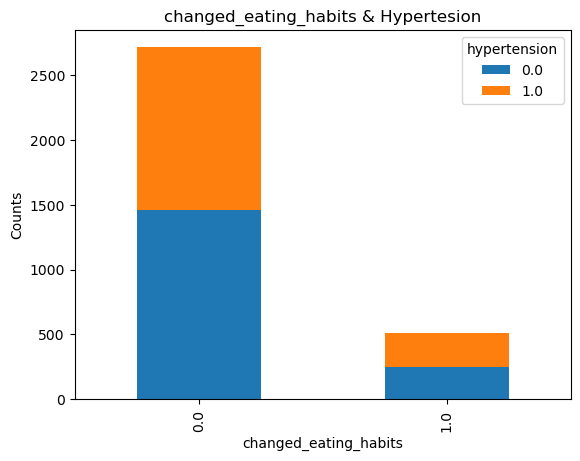

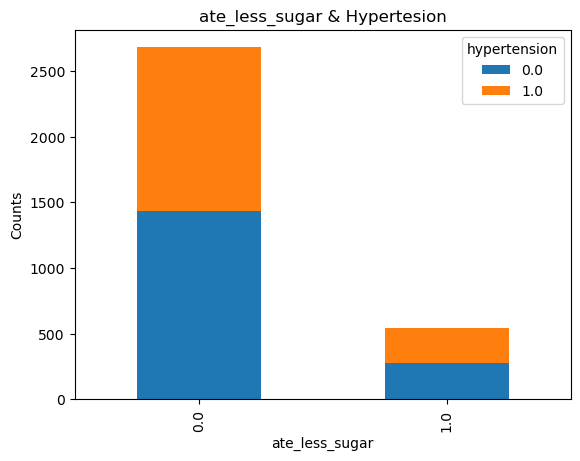

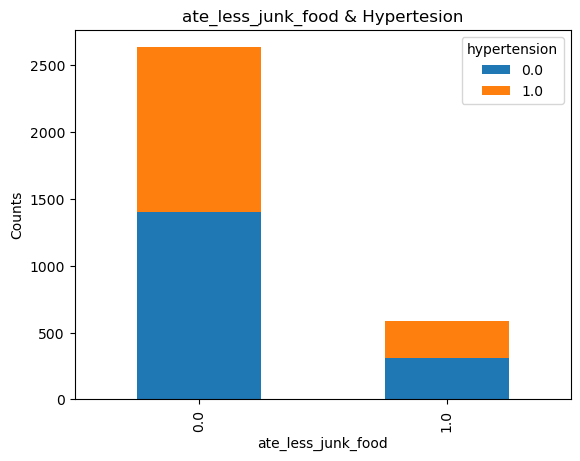

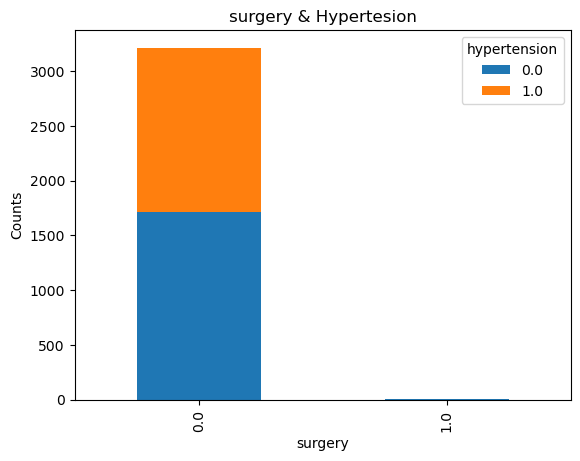

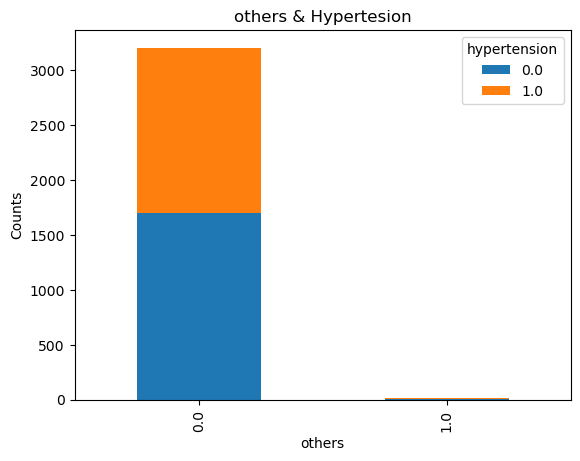

In [278]:
for column in num_cols:
    pd.crosstab(num_cols[column], target).plot(kind='bar', stacked=True)
    plt.title('{} & Hypertesion'.format(column))
    plt.xlabel('{}'.format(column))
    plt.ylabel('Counts')
    plt.show();

In [280]:
# function to classify age groups:
def age_group(age):
    if age <= 19:
        return '0-19'
    elif age <= 29:
        return '20-29'
    elif age <= 39:
        return '30-39'
    elif age <= 49:
        return '40-49'
    elif age <= 59:
        return '50-59'
    else:
        return '60 and above'

In [282]:
df3['Age_Intervals'] = pd.cut(df3['age'], [18,35,50,65,80], include_lowest=True, labels=['18-35','36-50','51-65','66+'])

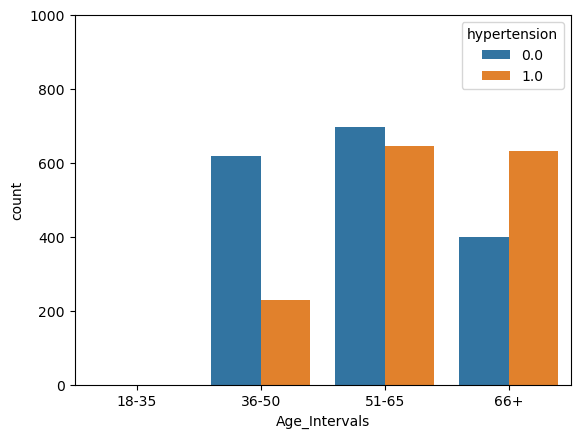

In [285]:
sns.countplot(data=df3, x='Age_Intervals', hue='hypertension').set(ylim=(0,1000));